## Importación de librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
import geopandas as gpd
from shapely.geometry import Point

In [2]:
# Configuración de estilo para las gráficas
sns.set(style="whitegrid")
# plt.rcParams['figure.figsize'] = (10, 6)

## Carga de los datos

In [3]:
# Cargar datos
ruta_datos_query = r"C:\Users\DELL\Documents\basesdedatosProyecto\Datos\BioTIMEQuery_24_06_2021.csv"
samples = pd.read_csv(ruta_datos_query, dtype={'PLOT': str, 'GENUS': str, 'SPECIES': str, 'GENUS_SPECIES': str});
samples.head(5)

,Unnamed: 0,STUDY_ID,DAY,MONTH,YEAR,SAMPLE_DESC,PLOT,ID_SPECIES,LATITUDE,LONGITUDE,sum.allrawdata.ABUNDANCE,sum.allrawdata.BIOMASS,GENUS,SPECIES,GENUS_SPECIES
0,1,10,NaN,NaN,1984,47.400000_-95.120000_12_Control_0_Medium,12,22,47.4,-95.12,1.0,0.0,Acer,rubrum,Acer rubrum
1,2,10,NaN,NaN,1984,47.400000_-95.120000_12_Control_0_Medium,12,23,47.4,-95.12,3.0,0.0,Acer,saccharum,Acer saccharum
2,3,10,NaN,NaN,1984,47.400000_-95.120000_12_Control_0_Medium,12,24,47.4,-95.12,1.0,0.0,Acer,spicatum,Acer spicatum
3,4,10,NaN,NaN,1984,47.400000_-95.120000_12_Control_0_Medium,12,607,47.4,-95.12,12.0,0.0,Corylus,cornuta,Corylus cornuta
4,5,10,NaN,NaN,1984,47.400000_-95.120000_12_Control_0_Small,12,1911,47.4,-95.12,1.0,0.0,Populus,pinnata,Populus pinnata


In [4]:
ruta_Datos_md = r"C:\Users\DELL\Documents\basesdedatosProyecto\Datos\BioTIMEMetadata_24_06_2021.csv"
studies = pd.read_csv(ruta_Datos_md, delimiter=',', encoding='ISO-8859-2', dtype={'REALM': str, 'CLIMATE': str, 'HABITAT': str, 'BIOME_MAP': str, 'DATA_SOURCE': str, 'DATE_STUDY_ADDED': str, 'ABUNDANCE_TYPE': str, 'BIOMASS_TYPE': str})
studies.head(5)

,STUDY_ID,REALM,CLIMATE,GENERAL_TREAT,TREATMENT,TREAT_COMMENTS,TREAT_DATE,HABITAT,PROTECTED_AREA,BIOME_MAP,...,WEB_LINK,DATA_SOURCE,METHODS,SUMMARY_METHODS,LINK_ID,COMMENTS,DATE_STUDY_ADDED,ABUNDANCE_TYPE,BIOMASS_TYPE,SAMPLE_DESC_NAME
0,10,Terrestrial,Temperate,NaN,NaN,NaN,NaN,Woodland,False,Temperate broadleaf and mixed forests,...,http://esapubs.org/archive/ecol/E082/011/defau...,Ecology,Itasca State Park. Minnesota. is a 13 000-ha f...,Plots,NaN,Dates added,Oct-12,Count,NaN,lat_long_treefallid_controlvs.treatment_basevs...
1,18,Terrestrial,Temperate,NaN,NaN,NaN,NaN,Sagebrush steppe,False,Deserts and xeric shrublands,...,http://esapubs.org/archive/ecol/E091/243/defau...,Ecology,Site descriptionThe U.S. Sheep Experiment Stat...,Plots,NaN,Dates added Years (1923. 1926. 1927. 1929) del...,Oct-12,Count,NaN,lat_long_quadrat_year
2,33,Marine,Temperate,NaN,NaN,NaN,NaN,Seaweed beds,False,Temperate shelf and seas ecoregions,...,http://plankt.oxfordjournals.org/content/32/5.toc,Oxford Journals,Sampling and enumeration of phytoplanktonWeekl...,Stations,NaN,Inaccurate decimal latitude/longitude conversi...,Oct-12,Count,NaN,lat_long_location_method_date
3,39,Terrestrial,Temperate,NaN,NaN,NaN,NaN,Deciduous forest,False,Temperate broadleaf and mixed forests,...,http://www.esajournals.org/toc/emon/56/3,Ecology,This study was conducted in the Hubbard Brook ...,Plots,NaN,Removed records prior to 1986 as per provider ...,Oct-12,Density,NaN,lat_long_timeTransect_year
4,41,Terrestrial,Temperate,NaN,NaN,NaN,NaN,Woodland,False,Temperate broadleaf and mixed forests,...,http://www.esajournals.org/toc/ecol/41/4,Ecology,Time and space and the variation of species - ...,Counts,NaN,Dates added,Oct-12,Count,NaN,lat_long_census_year


A continuación nos damos una breve idea de los datos faltantes para realizar la posterior preparación de los mismos:

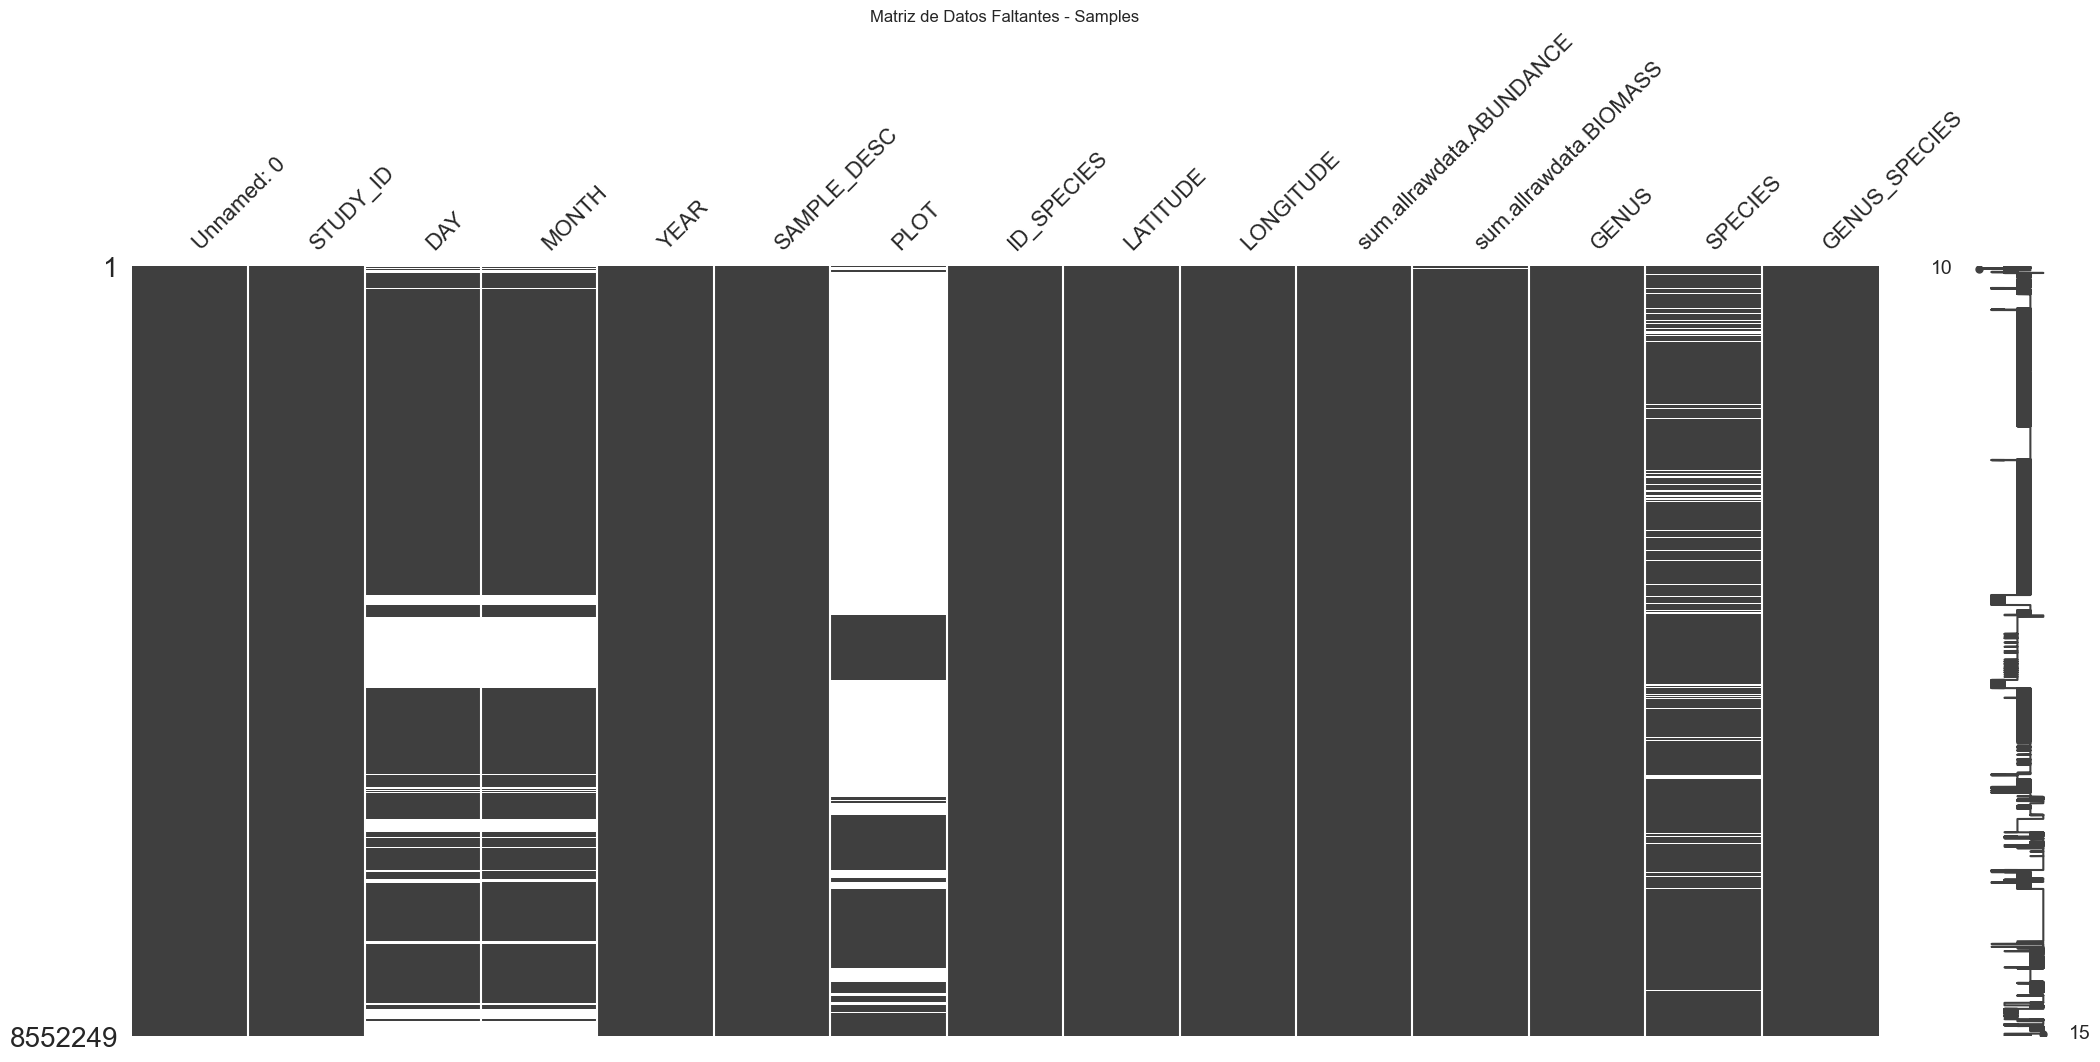

In [5]:
msno.matrix(samples)
plt.title("Matriz de Datos Faltantes - Samples")
plt.show()  

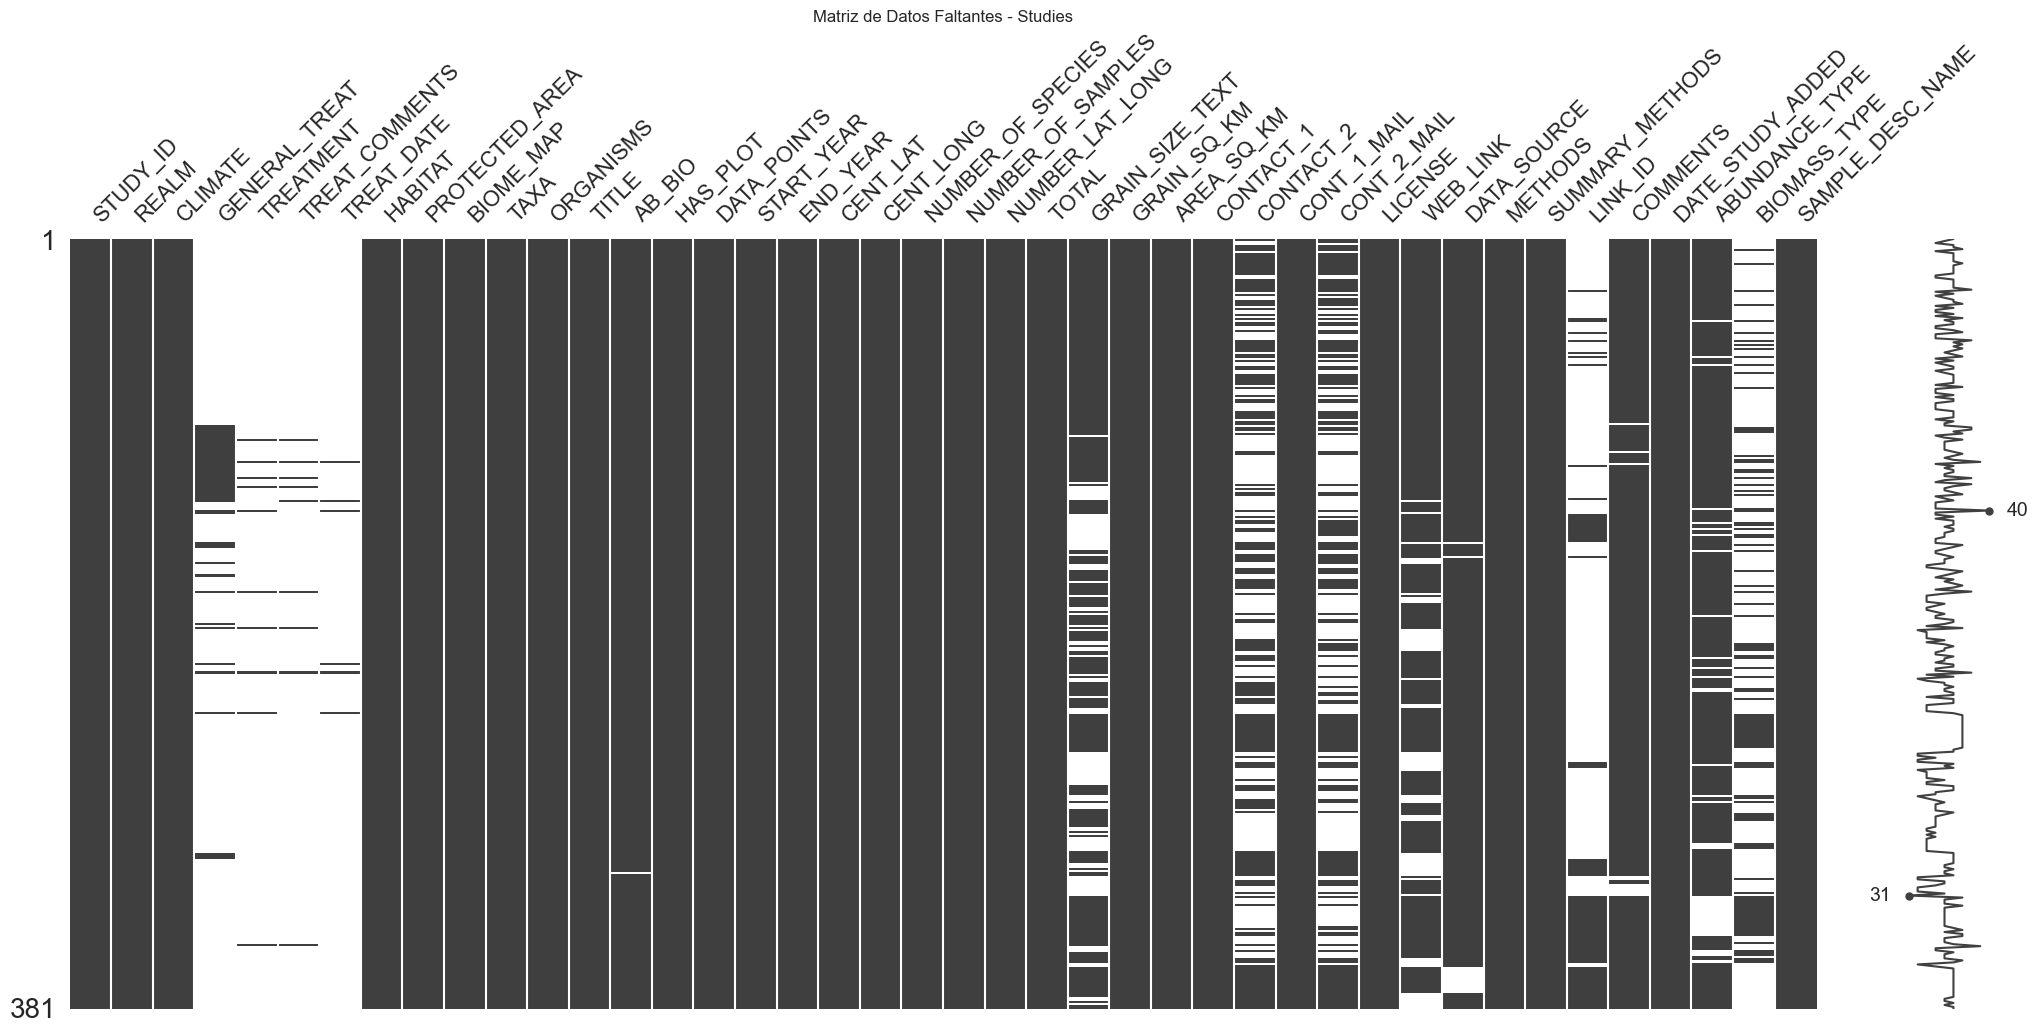

In [6]:
msno.matrix(studies)
plt.title("Matriz de Datos Faltantes - Studies")
plt.show()

## Preparación de los datos

Veamos primero que para el dataframe "BioTIMEQuery" tenemos datos que no nos sirven para analizar:

- Day y Month: Ya que lo que nos va a interesar es revisar el cambio en los años, ya que el cambio entre días o meses es casi inperceptible.
- SAMPLE_DESC: Es una descripción de la muestra tomada, lo que, para análisis, no nos sirve.
- Plot: Es una string que nos dice si el estudio original contiene gráficos, lo cual para este análisis no nos sirve, salvo para contrastar gráficos.
- sum.allrawdata.BIOMASS: Este atributo nos dice la biomasa total observada en la muestra, sin embargo, esta es 0 para cada registro. Por tanto, no podemos obtener información relevante de esta.

In [7]:
# Eliminar columnas innecesarias en studies (BioTIMEMetadata)
columns_to_drop_studies = ["GENERAL_TREAT", "TREATMENT", "TREAT_COMMENTS", "TREAT_DATE", 
                           "GRAIN_SIZE_TEXT", "CONTACT_1", "CONTACT_2", "CONT_1_MAIL", "CONT_2_MAIL", 
                           "LICENSE", "WEB_LINK", "DATA_SOURCE", "METHODS", "SUMMARY_METHODS", 
                           "LINK_ID", "COMMENTS", "ABUNDANCE_TYPE", "BIOMASS_TYPE", "SAMPLE_DESC_NAME",
                           "NUMBER_LAT_LONG", "TITLE"]
studies = studies.drop(columns=columns_to_drop_studies, errors='ignore')

In [8]:
# Eliminar columnas innecesarias en samples (BioTIMEQuery)
columns_to_drop_samples = ["DAY", "MONTH", "SAMPLE_DESC", "PLOT", "SPECIES", "Unnamed: 0"]
samples = samples.drop(columns=columns_to_drop_samples, errors='ignore')

A continuación realizamos una limpieza de los datos utilizando el método del rango intercuartílico (IQR) para detectar y eliminar outliers, adicionalmente eliminamos algunas columnas que no son relevantes para nuestro análisis.

In [9]:
# Función para eliminar outliers usando el rango intercuartílico (IQR)
def remove_outliers(df, columns):
    for col in columns:
        if df[col].dtype in ['float64', 'int64']:  # Solo aplicar a columnas numéricas
            
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

In [10]:
# Seleccionar columnas numéricas en cada dataset
# numeric_cols_samples = samples.select_dtypes(include=['float64', 'int64']).columns
# numeric_cols_studies = studies.select_dtypes(include=['float64', 'int64']).columns
numeric_cols_samples = ['sum.allrawdata.ABUNDANCE', 'sum.allrawdata.BIOMASS']
numeric_cols_studies = []

# Filtrar outliers en ambos datasets
samples_cleaned = remove_outliers(samples, numeric_cols_samples)
studies_cleaned = remove_outliers(studies, numeric_cols_studies)

In [11]:
# Mostrar la cantidad de filas antes y después del filtrado
print(f"Filas en 'samples' antes del filtrado: {len(samples)}, después: {len(samples_cleaned)}")
print(f"Filas en 'studies' antes del filtrado: {len(studies)}, después: {len(studies_cleaned)}")

Filas en 'samples' antes del filtrado: 8552249, después: 5688743
Filas en 'studies' antes del filtrado: 381, después: 381


## Análisis exploratorio de los datos

### Dataframe Samples

Dimensiones y muestra de datos:

In [12]:
print("Dimensiones de samples:", samples_cleaned.shape)

Dimensiones de samples: (5688743, 9)


In [13]:
samples_cleaned.head(5)

,STUDY_ID,YEAR,ID_SPECIES,LATITUDE,LONGITUDE,sum.allrawdata.ABUNDANCE,sum.allrawdata.BIOMASS,GENUS,GENUS_SPECIES
0,10,1984,22,47.4,-95.12,1.0,0.0,Acer,Acer rubrum
1,10,1984,23,47.4,-95.12,3.0,0.0,Acer,Acer saccharum
2,10,1984,24,47.4,-95.12,1.0,0.0,Acer,Acer spicatum
3,10,1984,607,47.4,-95.12,12.0,0.0,Corylus,Corylus cornuta
4,10,1984,1911,47.4,-95.12,1.0,0.0,Populus,Populus pinnata


Información general:

In [14]:
print(samples_cleaned.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
Index: 5688743 entries, 0 to 8526066
Data columns (total 9 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   STUDY_ID                  int64  
 1   YEAR                      int64  
 2   ID_SPECIES                int64  
 3   LATITUDE                  float64
 4   LONGITUDE                 float64
 5   sum.allrawdata.ABUNDANCE  float64
 6   sum.allrawdata.BIOMASS    float64
 7   GENUS                     object 
 8   GENUS_SPECIES             object 
dtypes: float64(4), int64(3), object(2)
memory usage: 434.0+ MB
None 



In [16]:
samples_cleaned.columns

Index(['STUDY_ID', 'YEAR', 'ID_SPECIES', 'LATITUDE', 'LONGITUDE',
       'sum.allrawdata.ABUNDANCE', 'sum.allrawdata.BIOMASS', 'GENUS',
       'GENUS_SPECIES'],
      dtype='object')

Estadísticos descriptivos:

In [17]:
print(samples_cleaned.describe(), "\n")

           STUDY_ID          YEAR    ID_SPECIES      LATITUDE     LONGITUDE  \
count  5.688743e+06  5.688743e+06  5.688743e+06  5.688743e+06  5.688743e+06   
mean   2.159586e+02  1.993370e+03  1.647243e+04  3.097264e+01 -3.687220e+01   
std    1.028462e+02  1.510873e+01  1.500457e+04  2.824556e+01  8.664221e+01   
min    1.000000e+01  1.874000e+03  1.000000e+00 -8.898167e+01 -1.800000e+02   
25%    1.290000e+02  1.986000e+03  4.598000e+03  2.851000e+01 -9.647200e+01   
50%    1.950000e+02  1.996000e+03  8.740000e+03  3.916470e+01 -7.064000e+01   
75%    2.540000e+02  2.003000e+03  2.663200e+04  4.674256e+01 -2.001360e+00   
max    5.160000e+02  2.016000e+03  5.205700e+04  8.970000e+01  1.800000e+02   

       sum.allrawdata.ABUNDANCE  sum.allrawdata.BIOMASS  
count              5.688743e+06            5.688743e+06  
mean               2.453589e+00            7.096013e-02  
std                2.720647e+00            2.048569e-01  
min                0.000000e+00            0.000000e+00 

Conteo de valores faltantes:

In [18]:
# Conteo de valores faltantes por columna
print("Valores faltantes en samples:")
print(samples_cleaned.isnull().sum(), "\n")

Valores faltantes en samples:
STUDY_ID                    0
YEAR                        0
ID_SPECIES                  0
LATITUDE                    0
LONGITUDE                   0
sum.allrawdata.ABUNDANCE    0
sum.allrawdata.BIOMASS      0
GENUS                       0
GENUS_SPECIES               0
dtype: int64 



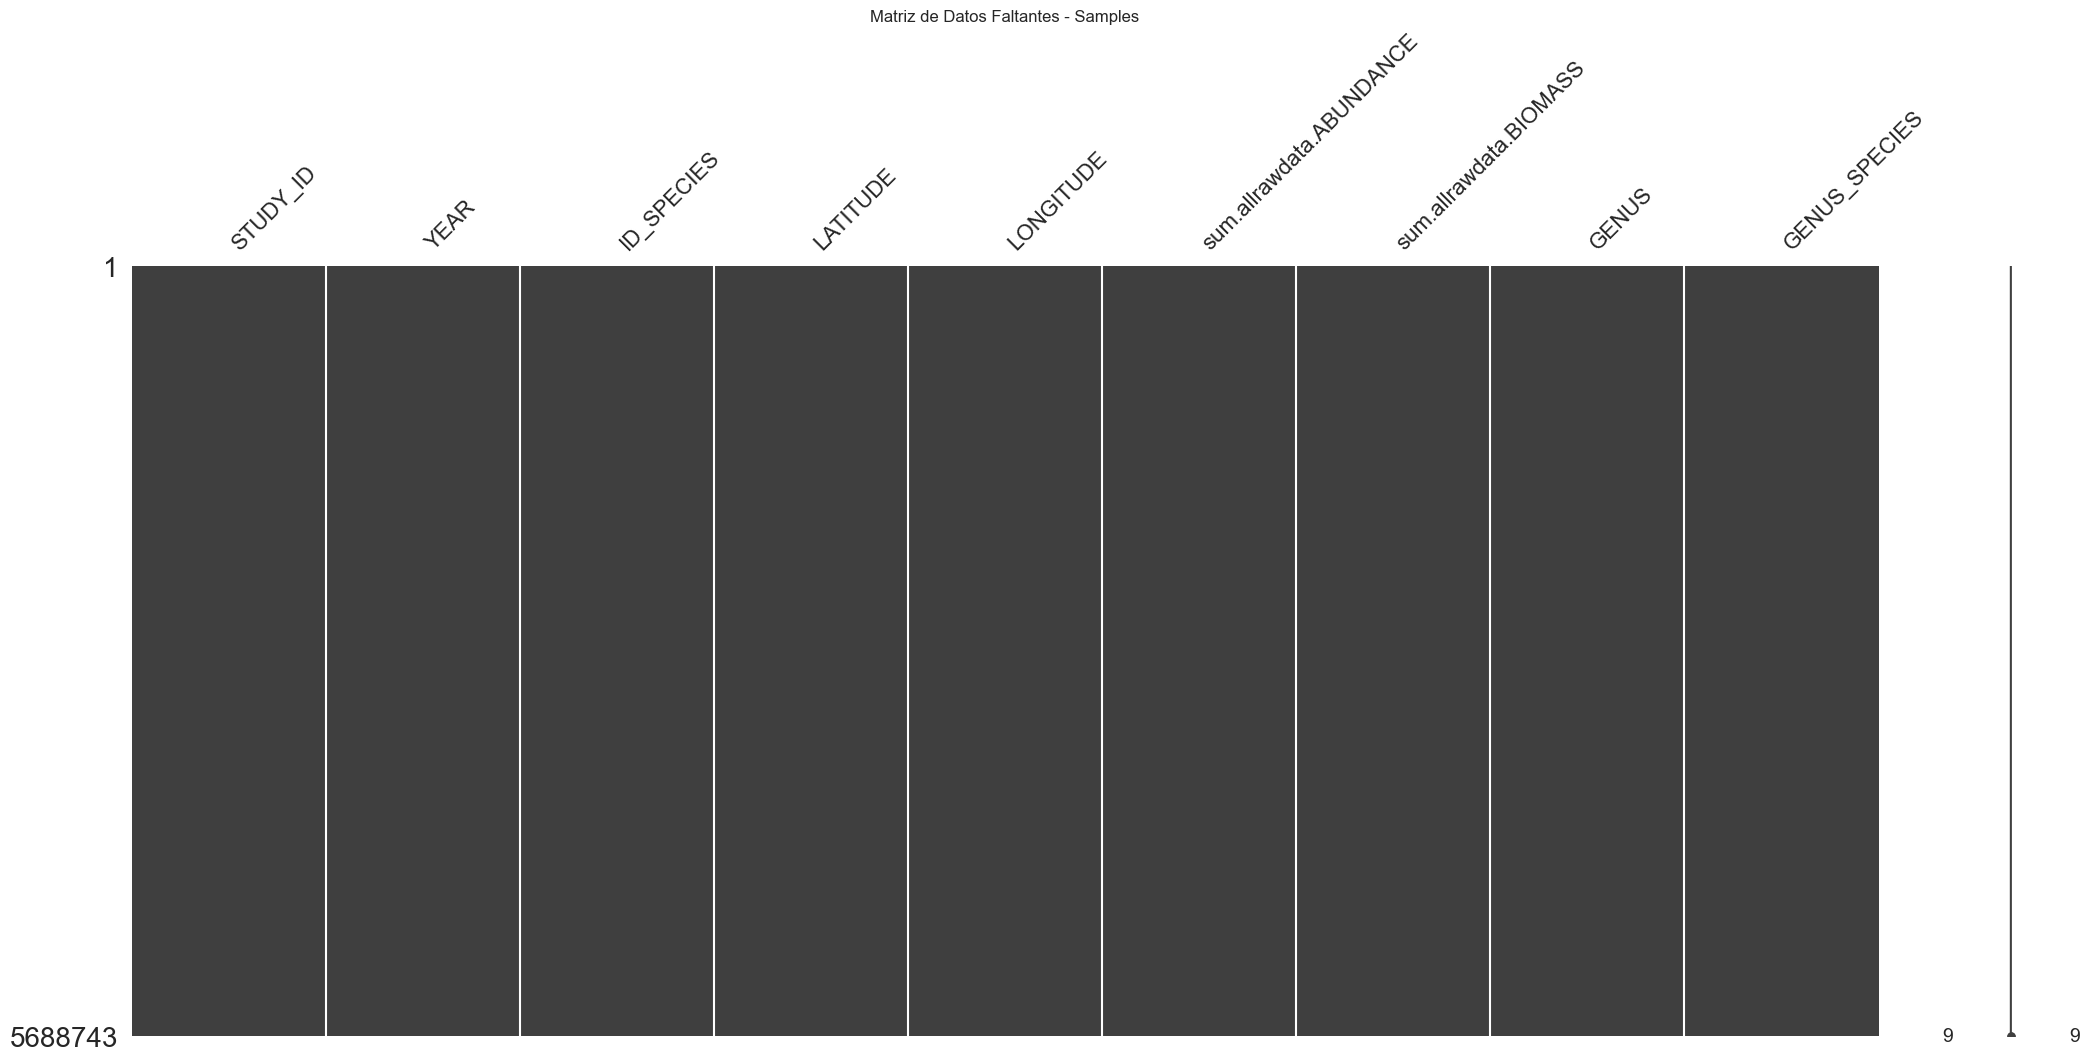

In [19]:
msno.matrix(samples_cleaned)
plt.title("Matriz de Datos Faltantes - Samples")
plt.show()  

Histogramas para variables numéricas

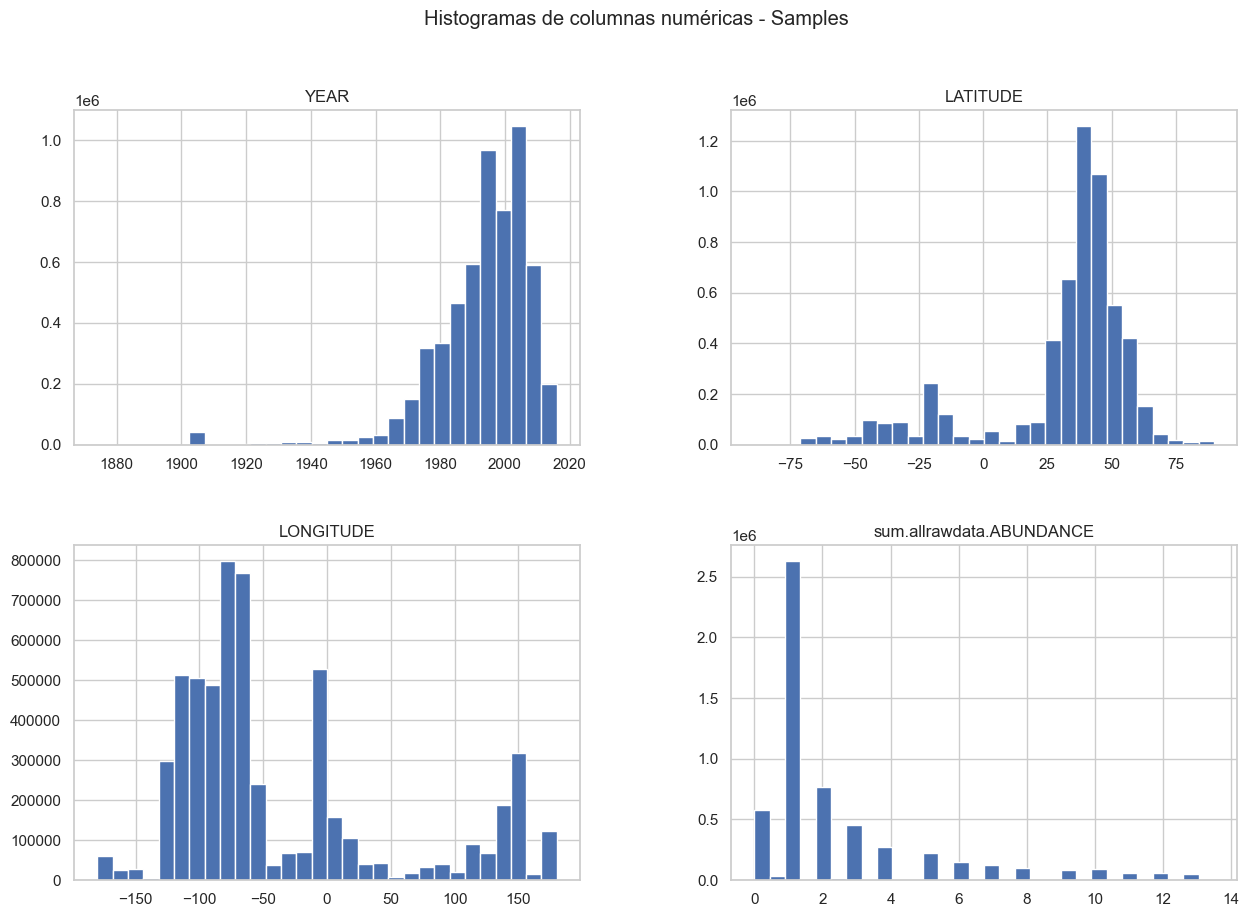

In [20]:
numeric_cols = ['YEAR', 'LATITUDE', 'LONGITUDE', 
                'sum.allrawdata.ABUNDANCE'] # 'sum.allrawdata.BIOMASS'
samples_cleaned[numeric_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogramas de columnas numéricas - Samples")
plt.show()

Matriz de correlaciones:

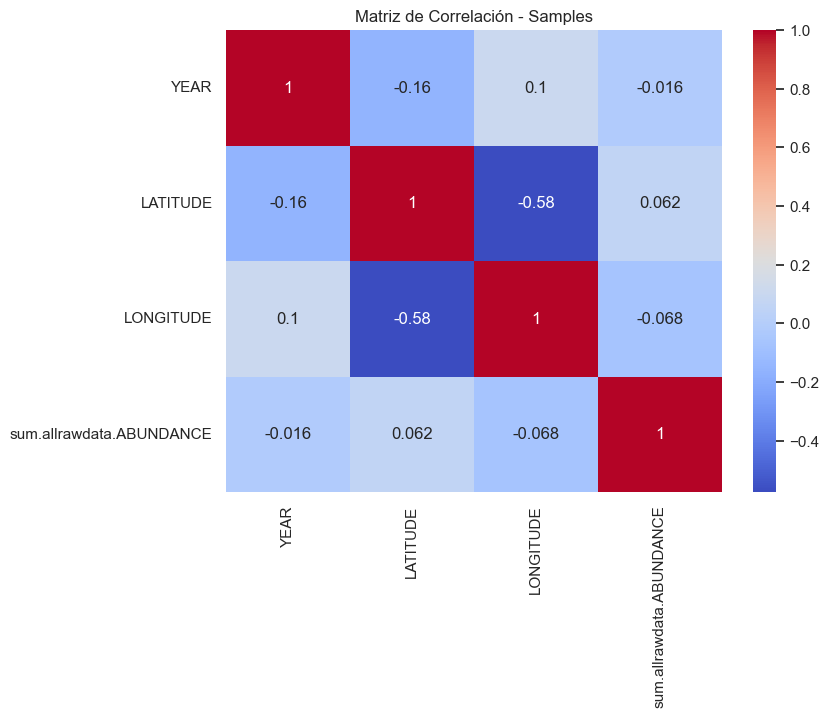

In [21]:
# Matriz de correlación para variables numéricas
corr = samples_cleaned[numeric_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación - Samples")
plt.show()

La matriz de correlación de Pearson nos indica que no hay ningun par de variables fuertemente relacionadas. Luego la abundancia media no depende ni de la zona geográfica ni del año en que el estudio fue realizado. Así pues, más adelante se investigará si la abundancia está más relacionada con el tipo de bioma o clima en donde se hizo el estudio.

Análisis espacial: Distribución geográfica según Abundancia

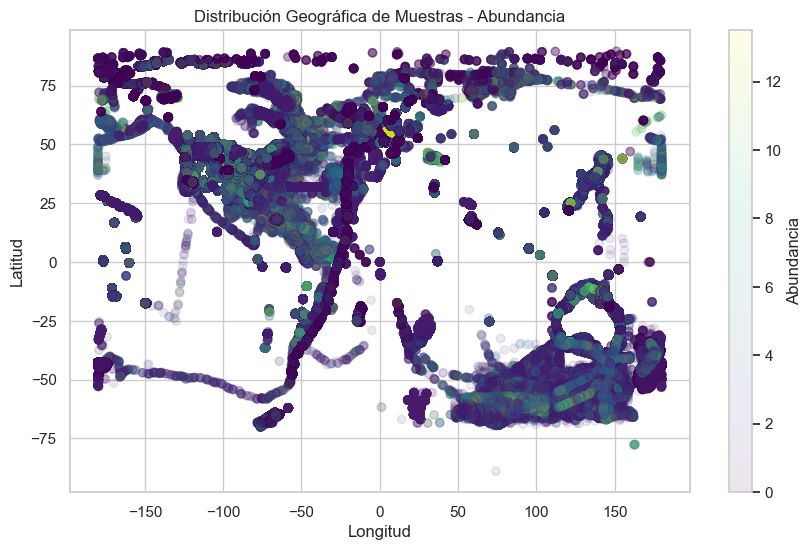

In [22]:
# Análisis espacial: Distribución geográfica según Abundancia
plt.figure(figsize=(10, 6))
scatter = plt.scatter(samples_cleaned['LONGITUDE'], samples_cleaned['LATITUDE'], 
                      c=samples_cleaned['sum.allrawdata.ABUNDANCE'], cmap='viridis', alpha=0.1)
plt.colorbar(scatter, label='Abundancia')
plt.title("Distribución Geográfica de Muestras - Abundancia")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

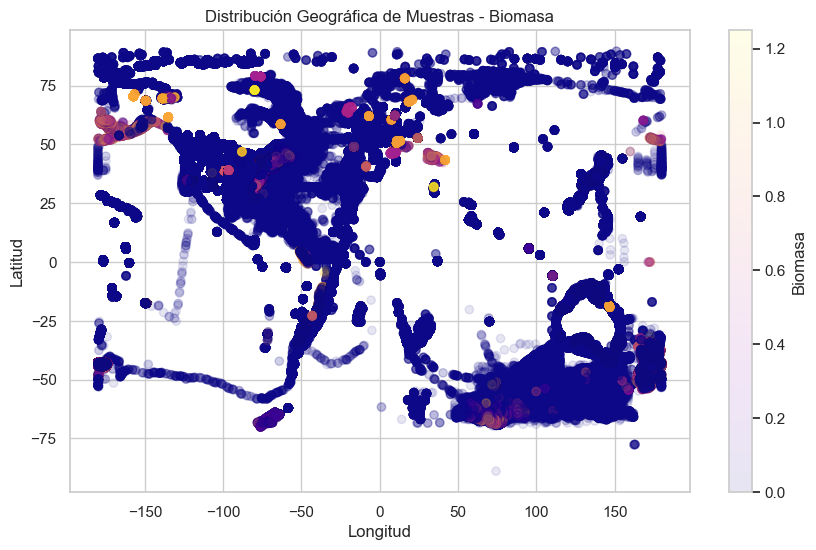

In [25]:
# Análisis espacial: Distribución geográfica según Biomasa
plt.figure(figsize=(10, 6))
scatter = plt.scatter(samples_cleaned['LONGITUDE'], samples_cleaned['LATITUDE'], 
                    c=samples_cleaned['sum.allrawdata.BIOMASS'], cmap='plasma', alpha=0.1)
plt.colorbar(scatter, label='Biomasa')
plt.title("Distribución Geográfica de Muestras - Biomasa")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

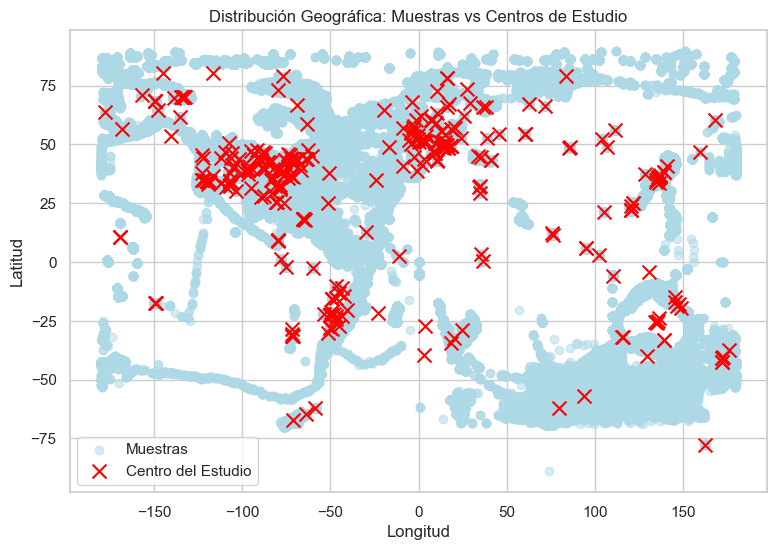

In [26]:
# Comparación espacial: Muestras vs Centros de Estudio
plt.figure(figsize=(9, 6))
plt.scatter(
  samples_cleaned['LONGITUDE'], samples_cleaned['LATITUDE'],
  c='lightblue', alpha=0.5, label='Muestras'
)
plt.scatter(
  studies_cleaned['CENT_LONG'], studies_cleaned['CENT_LAT'],
  c='red', marker='x', s=100, label='Centro del Estudio'
)
plt.title('Distribución Geográfica: Muestras vs Centros de Estudio')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(loc='lower left')
plt.show()

A continuación asociamos cada par de coordenadas (latitud y longitud) a un país realizando un cruce espacial con un shapefile (o dataset geográfico), para esto, utilizamos el dataset límites del mundo que provee GeoPandas

In [27]:
shapefile_path = "./world/ne_10m_admin_0_countries.shp"
world = gpd.read_file(shapefile_path)

Ahora, para asociar las muestras a los países, creamos una columna `geometry` a partir de LONGITUDE y LATITUDE para las muestras

In [28]:
geometry_samples = [Point(xy) for xy in zip(samples_cleaned['LONGITUDE'], samples_cleaned['LATITUDE'])]
gdf_samples = gpd.GeoDataFrame(samples_cleaned, geometry=geometry_samples)
gdf_samples.crs = "EPSG:4326"  # Sistema de coordenadas geográficas

Realizamos un spatial join para asignar el país a cada muestra:

In [29]:
samples_with_country = gpd.sjoin(gdf_samples, world, how="left", predicate="within")

Mostramos algunas filas para comprobar la asignación del país (la columna 'NAME' o similar dependerá del shapefile)

In [30]:
samples_with_country[['LONGITUDE', 'LATITUDE', 'sum.allrawdata.ABUNDANCE', 'NAME']].head(5)

,LONGITUDE,LATITUDE,sum.allrawdata.ABUNDANCE,NAME
0,-95.12,47.4,1.0,United States of America
1,-95.12,47.4,3.0,United States of America
2,-95.12,47.4,1.0,United States of America
3,-95.12,47.4,12.0,United States of America
4,-95.12,47.4,1.0,United States of America


Calculamos el número de muestras por país y graficamos:

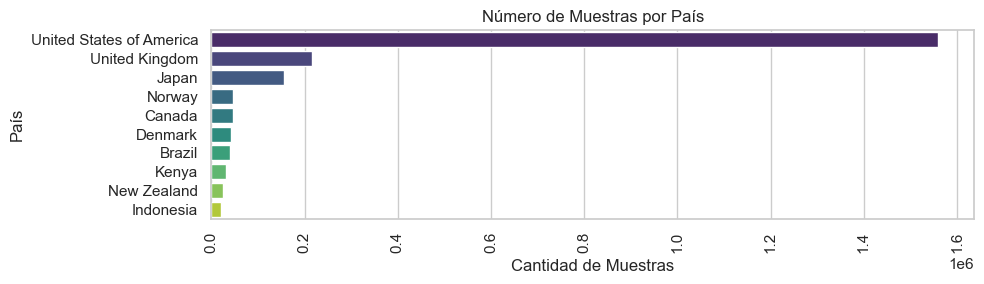

In [31]:
samples_by_country = samples_with_country.groupby('NAME').size().reset_index(name='counts')
samples_by_country.sort_values('counts', ascending=False, inplace=True)
# Gráfica: Número de muestras por país
plt.figure(figsize=(10, 3))
sns.barplot(data=samples_by_country[:10], x='counts', y='NAME', palette="viridis", hue='NAME')
plt.xticks(rotation=90)
plt.title("Número de Muestras por País")
plt.xlabel("Cantidad de Muestras")
plt.ylabel("País")
plt.tight_layout()
plt.show()

### Dataframe Studies

In [32]:
print("Dimensiones de studies:", studies_cleaned.shape)

Dimensiones de studies: (381, 21)


In [33]:
studies_cleaned.head(5)

,STUDY_ID,REALM,CLIMATE,HABITAT,PROTECTED_AREA,BIOME_MAP,TAXA,ORGANISMS,AB_BIO,HAS_PLOT,...,START_YEAR,END_YEAR,CENT_LAT,CENT_LONG,NUMBER_OF_SPECIES,NUMBER_OF_SAMPLES,TOTAL,GRAIN_SQ_KM,AREA_SQ_KM,DATE_STUDY_ADDED
0,10,Terrestrial,Temperate,Woodland,False,Temperate broadleaf and mixed forests,Terrestrial plants,woody plants,A,Y,...,1984,1996,47.40,-95.120,25,191,1406,4.000000e-06,0.000006,Oct-12
1,18,Terrestrial,Temperate,Sagebrush steppe,False,Deserts and xeric shrublands,Terrestrial plants,sagebrush steppe plants,A,Y,...,1923,1973,44.33,-112.330,98,542,8034,1.000000e-06,0.000006,Oct-12
2,33,Marine,Temperate,Seaweed beds,False,Temperate shelf and seas ecoregions,Marine plants,phytoplankton,A,S,...,1992,2009,50.25,-4.217,170,1,17841,1.580000e-08,0.000006,Oct-12
3,39,Terrestrial,Temperate,Deciduous forest,False,Temperate broadleaf and mixed forests,Birds,birds,A,S,...,1970,2015,43.91,-71.750,52,45,959,5.000000e-02,0.100000,Oct-12
4,41,Terrestrial,Temperate,Woodland,False,Temperate broadleaf and mixed forests,Birds,birds,A,S,...,1923,1940,39.50,-82.480,56,10,418,2.800000e-01,0.000005,Oct-12


Información general

In [34]:
print(studies_cleaned.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   STUDY_ID           381 non-null    int64  
 1   REALM              381 non-null    object 
 2   CLIMATE            381 non-null    object 
 3   HABITAT            381 non-null    object 
 4   PROTECTED_AREA     381 non-null    bool   
 5   BIOME_MAP          381 non-null    object 
 6   TAXA               381 non-null    object 
 7   ORGANISMS          381 non-null    object 
 8   AB_BIO             380 non-null    object 
 9   HAS_PLOT           381 non-null    object 
 10  DATA_POINTS        381 non-null    int64  
 11  START_YEAR         381 non-null    int64  
 12  END_YEAR           381 non-null    int64  
 13  CENT_LAT           381 non-null    float64
 14  CENT_LONG          381 non-null    float64
 15  NUMBER_OF_SPECIES  381 non-null    int64  
 16  NUMBER_OF_SAMPLES  381 non

Estadísticos descriptivos:

In [35]:
print(studies_cleaned.describe(), "\n")

         STUDY_ID  DATA_POINTS   START_YEAR     END_YEAR    CENT_LAT  \
count  381.000000   381.000000   381.000000   381.000000  381.000000   
mean   318.818898    13.249344  1985.910761  2003.603675   30.532986   
std    142.255094    12.785200    21.370969    13.176849   31.272872   
min     10.000000     2.000000  1874.000000  1909.000000  -77.665463   
25%    213.000000     4.000000  1977.000000  2000.000000   23.948044   
50%    338.000000     9.000000  1990.000000  2008.000000   39.095300   
75%    436.000000    18.000000  2000.000000  2012.000000   49.100250   
max    548.000000    97.000000  2015.000000  2018.000000   80.624583   

        CENT_LONG  NUMBER_OF_SPECIES  NUMBER_OF_SAMPLES          TOTAL  \
count  381.000000         381.000000         381.000000     381.000000   
mean   -23.232297         199.283465        3675.249344   23021.133858   
std     85.023922         530.038210       16660.664333   74875.628247   
min   -178.000000           3.000000           1.000000

Conteo de datos 

In [36]:
# Conteo de valores faltantes por columna
print("Valores faltantes en studies:")
print(studies_cleaned.isnull().sum(), "\n")

Valores faltantes en studies:
STUDY_ID             0
REALM                0
CLIMATE              0
HABITAT              0
PROTECTED_AREA       0
BIOME_MAP            0
TAXA                 0
ORGANISMS            0
AB_BIO               1
HAS_PLOT             0
DATA_POINTS          0
START_YEAR           0
END_YEAR             0
CENT_LAT             0
CENT_LONG            0
NUMBER_OF_SPECIES    0
NUMBER_OF_SAMPLES    0
TOTAL                0
GRAIN_SQ_KM          0
AREA_SQ_KM           0
DATE_STUDY_ADDED     0
dtype: int64 



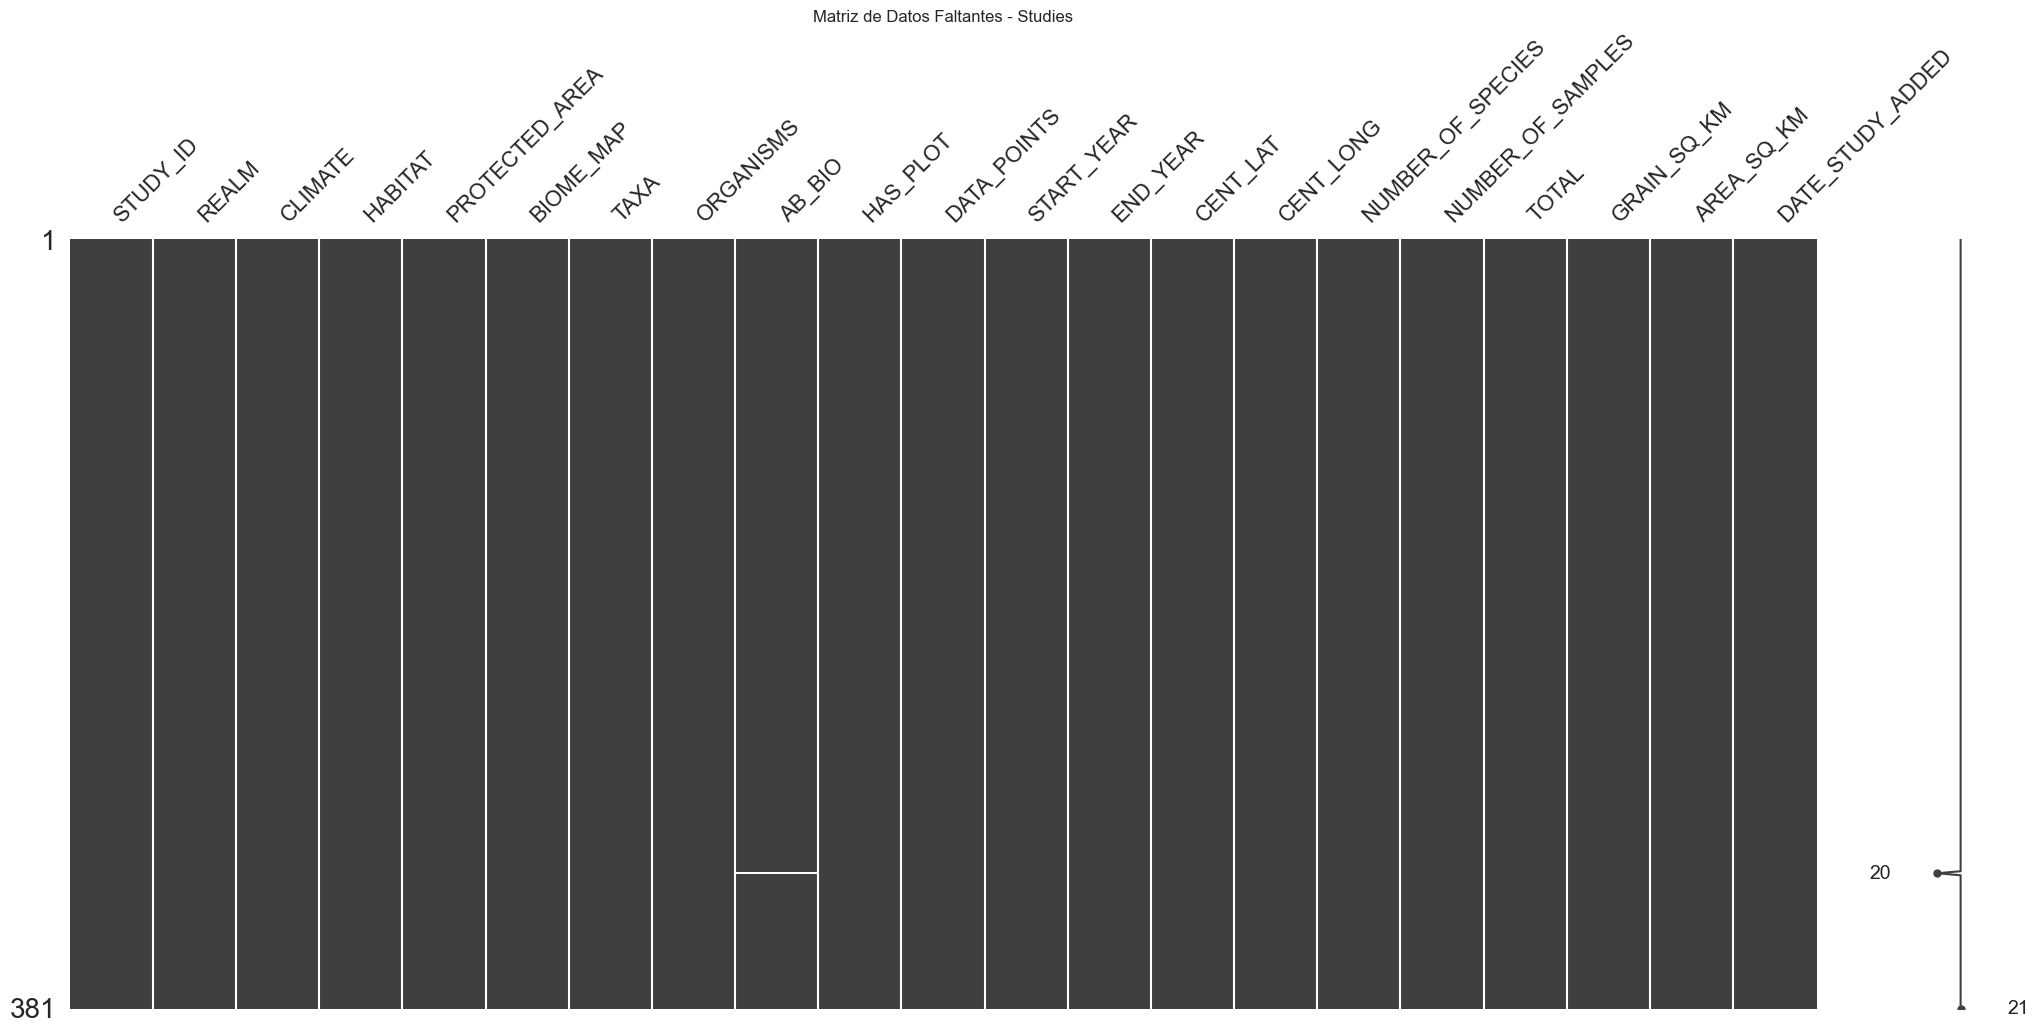

In [37]:
msno.matrix(studies_cleaned)
plt.title("Matriz de Datos Faltantes - Studies")
plt.show()

Histogramas para variables numéricas

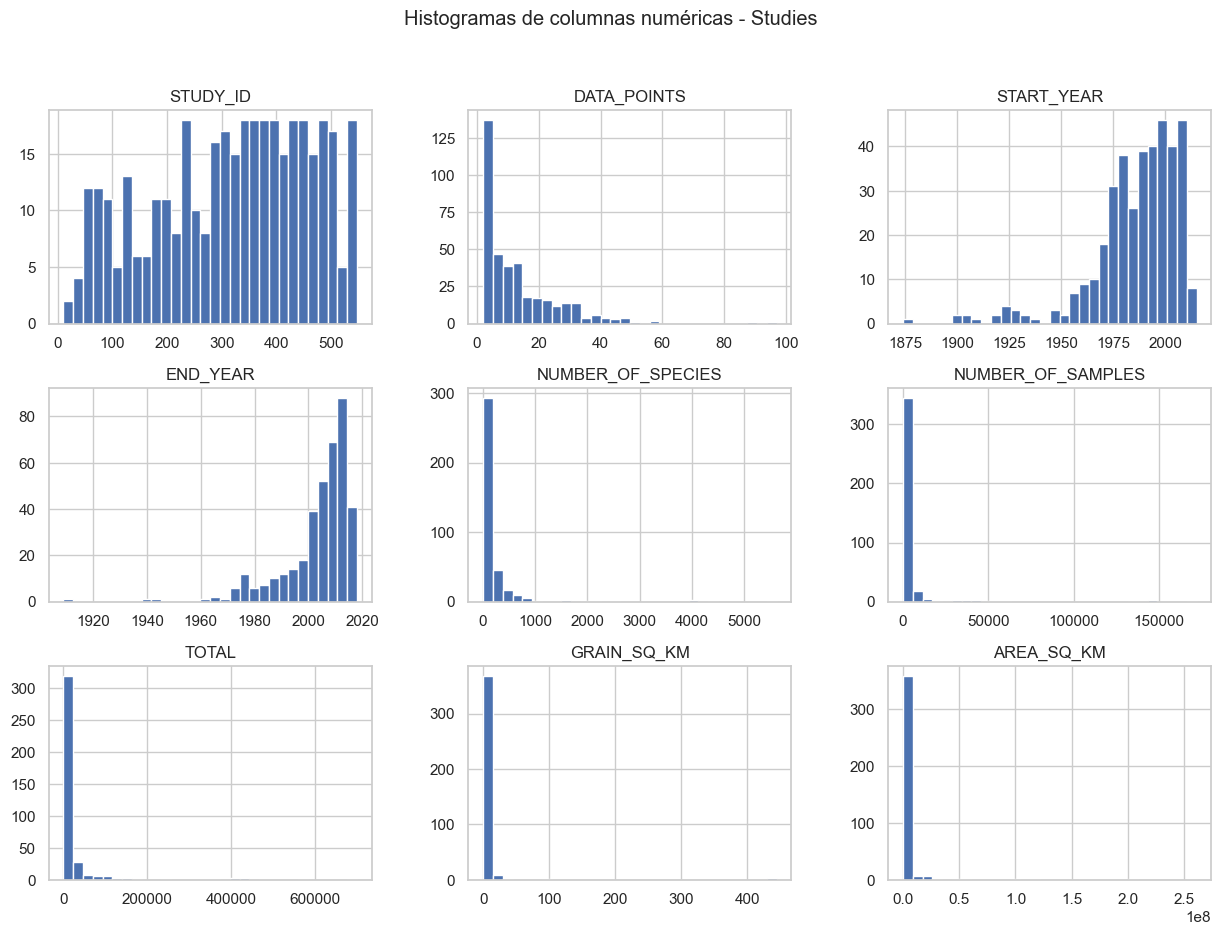

In [38]:
# Histogramas para algunas columnas numéricas relevantes
numeric_cols = ['STUDY_ID', 'DATA_POINTS', 'START_YEAR', 'END_YEAR', 
                'NUMBER_OF_SPECIES', 'NUMBER_OF_SAMPLES', 'TOTAL', 
                'GRAIN_SQ_KM', 'AREA_SQ_KM']
studies_cleaned[numeric_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogramas de columnas numéricas - Studies")
plt.show()

Conteo para algunas variables categóricas

In [39]:
def plot_count(feature, title, df, size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))

    # Configuración de countplot (ahora con `y` y `hue` correctamente definidos)
    g = sns.countplot(y=df[feature], order=df[feature].value_counts().index[:20], 
                      palette='Oranges', hue=df[feature], legend=False)

    g.set_title(f"Number and percentage of {title}")

    # Ajuste de etiquetas de porcentaje dentro de las barras
    for p in ax.patches:
        width = p.get_width()  # Ahora tomamos el ancho de la barra (valor de conteo)
        ax.text(width + 3,  # Coloca la etiqueta a la derecha de la barra
                p.get_y() + p.get_height()/2,  # Centra en la barra
                '{:1.2f}%'.format(100 * width / total), 
                ha="center", va="center") 

    plt.show()

Veamos el número y porcentaje de las especies por cada uno de los reinos globales

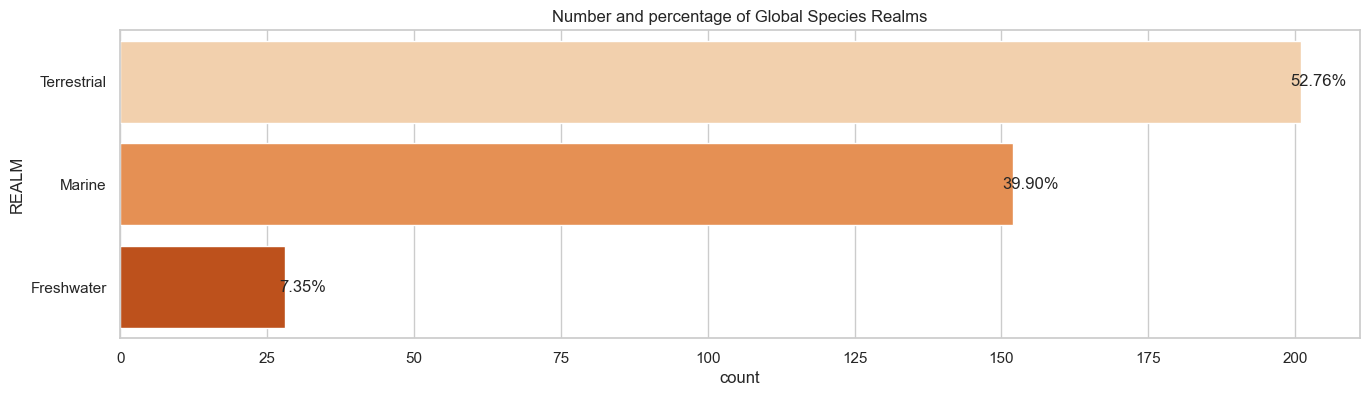

In [40]:
# Llamar la función
plot_count("REALM", "Global Species Realms", studies, 4)

Podemos hacer lo mismo del gráfico anterior, pero esta vez para climas en lugar de ecosistemas:

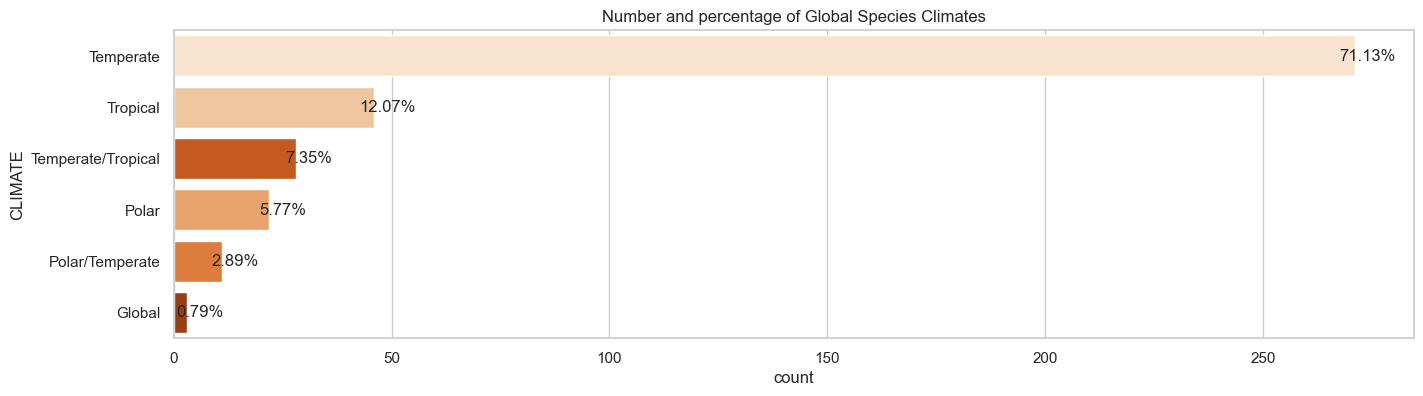

In [41]:
plot_count("CLIMATE", "Global Species Climates", studies,4)

Podemos ver ahora el grafico de barras que cuenta la biomasa o abundancia dependiendo del clima de la zona del estudio

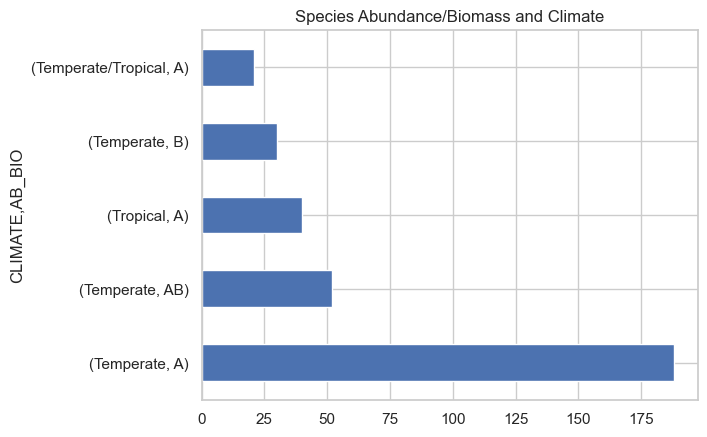

In [42]:
studies[['CLIMATE', 'AB_BIO']].value_counts().head().plot(kind='barh')

plt.title('Species Abundance/Biomass and Climate');

También podemos observar el numero y porcentaje de especies respecto a si el territorio es protegido o no. De aquí vemos que la mayoría de los estudios fueron llevados a cabo en zonas no protegidas.

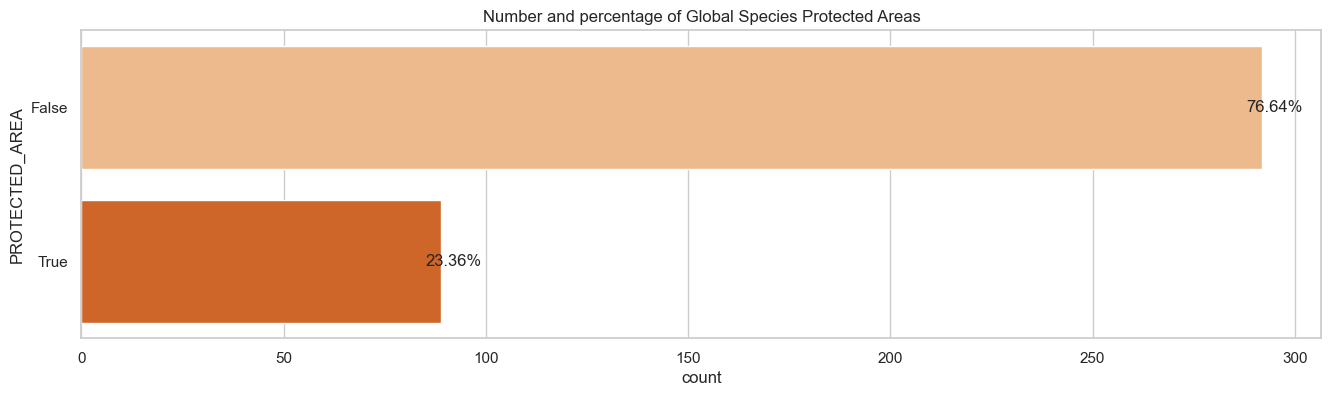

In [43]:
plot_count("PROTECTED_AREA", "Global Species Protected Areas", studies,4)

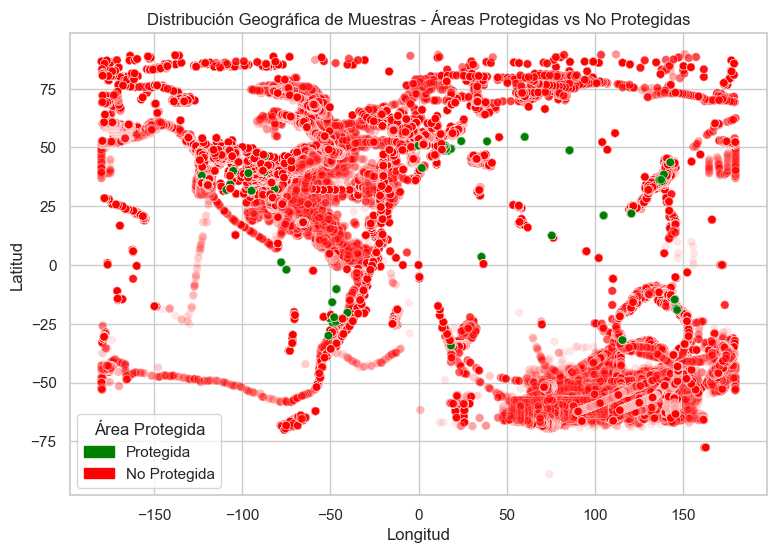

In [44]:
import matplotlib.patches as mpatches

merged_data = samples.merge(studies[['STUDY_ID', 'PROTECTED_AREA']], on='STUDY_ID', how='left')
merged_data['PROTECTED_AREA'] = merged_data['PROTECTED_AREA'].astype(str)
plt.figure(figsize=(9, 6))
sns.scatterplot(
    data=merged_data, 
    x="LONGITUDE", 
    y="LATITUDE", 
    hue="PROTECTED_AREA", 
    palette={"True": "green", "False": "red"}, 
    alpha=0.1,
    legend=False
)

legend_labels = [
    mpatches.Patch(color="green", label="Protegida"),
    mpatches.Patch(color="red", label="No Protegida")
]
plt.legend(handles=legend_labels, title="Área Protegida", loc="lower left")

plt.title("Distribución Geográfica de Muestras - Áreas Protegidas vs No Protegidas")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

También podemos ver el numero y porcentaje del tipo de especies en los estudios

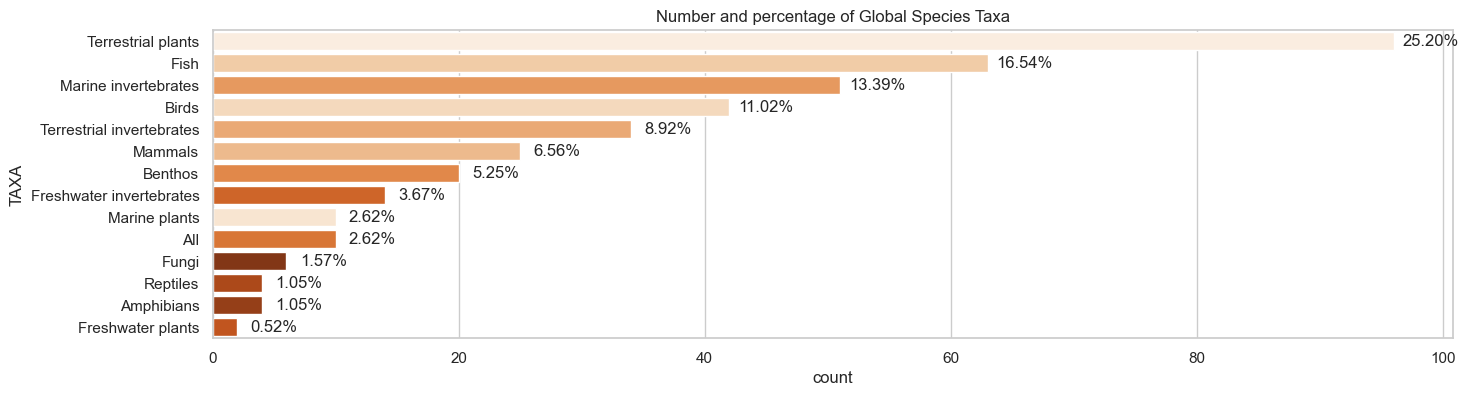

In [ ]:
plot_count("TAXA", "Global Species Taxa", studies,4)

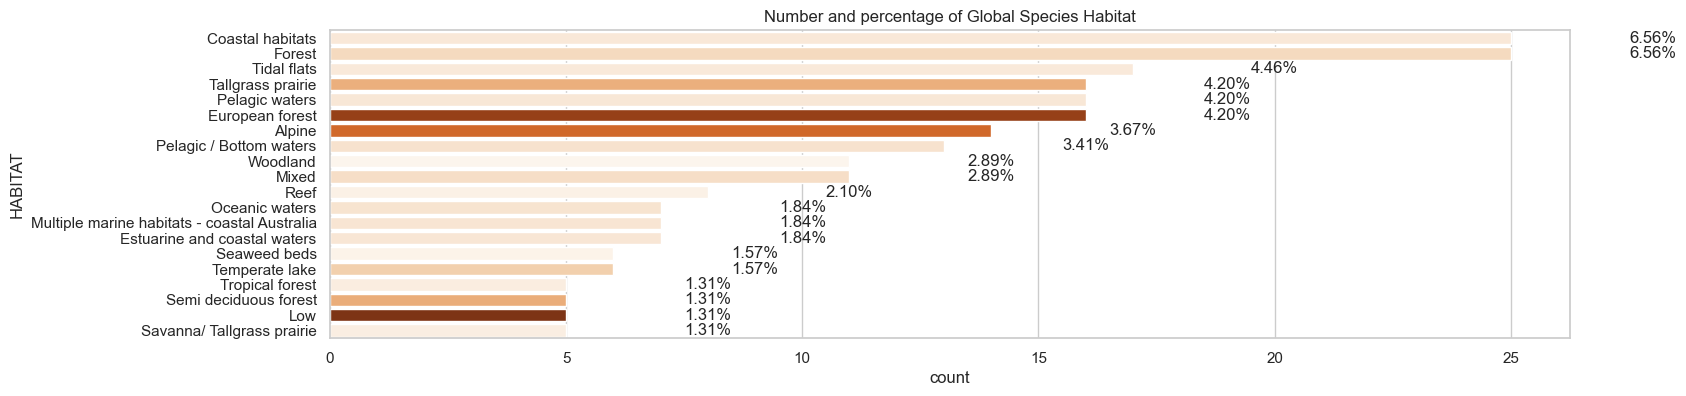

In [ ]:
plot_count("HABITAT", "Global Species Habitat", studies,4)

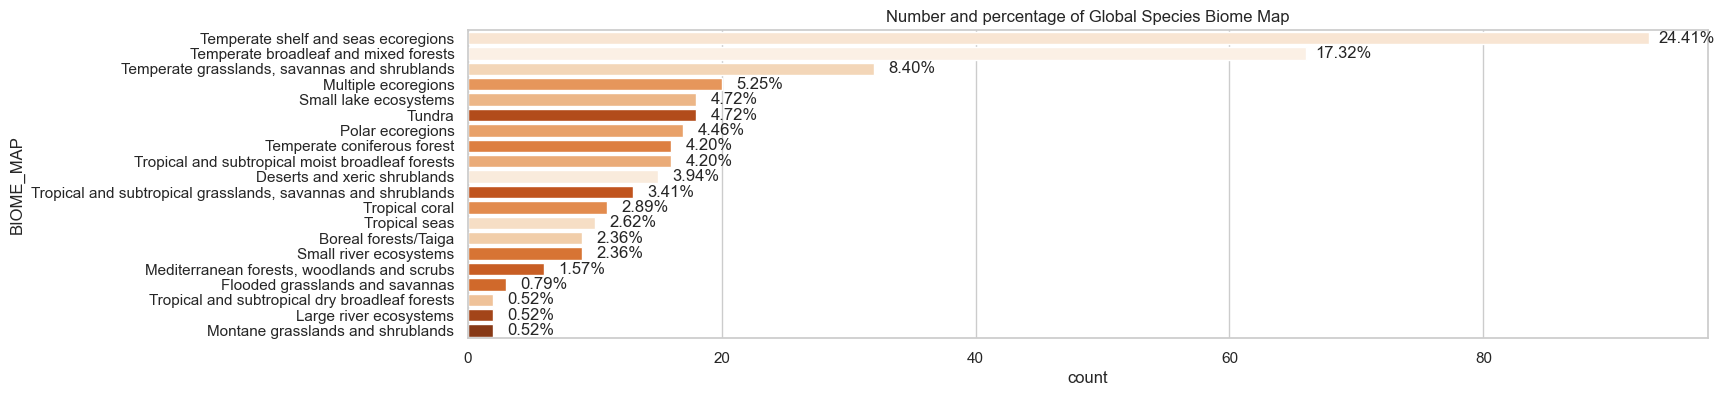

In [ ]:
plot_count("BIOME_MAP", "Global Species Biome Map", studies,4)

Análisis temporal: Tendencias anuales 

In [75]:
# Agrupar por año para obtener la abundancia y biomasa promedio
yearly_data = samples.groupby('YEAR').agg({
  'sum.allrawdata.ABUNDANCE': 'mean',
  'sum.allrawdata.BIOMASS': 'mean'
}).reset_index()

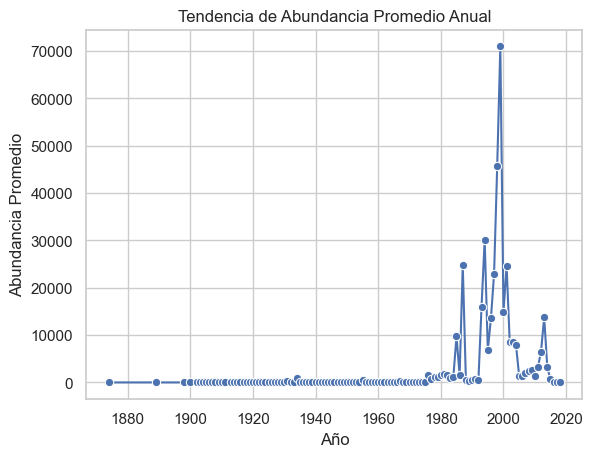

In [77]:
# Gráfica: Abundancia promedio anual
plt.figure()
sns.lineplot(data=yearly_data, x='YEAR', y='sum.allrawdata.ABUNDANCE', marker='o')
plt.title('Tendencia de Abundancia Promedio Anual')
plt.xlabel('Año')
plt.ylabel('Abundancia Promedio')
plt.grid(True)
plt.show()

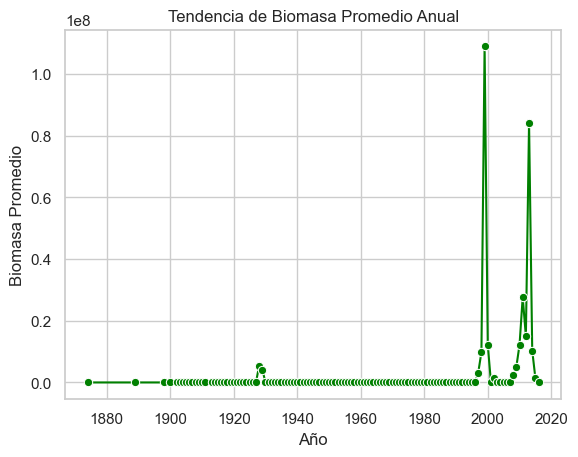

In [ ]:
# Gráfica: Biomasa promedio anual
plt.figure()
sns.lineplot(data=yearly_data, x='YEAR', y='sum.allrawdata.BIOMASS', marker='o', color='green')
plt.title('Tendencia de Biomasa Promedio Anual')
plt.xlabel('Año')
plt.ylabel('Biomasa Promedio')
plt.grid(True)
plt.show()

# Datos USA



Ya que tenemos un preliminar de los datos, continuemos con un análisis más profundo respecto a los datos registrados en Estados Unidos.

In [57]:
samples_usa = samples_with_country.loc[samples_with_country["NAME"] == "United States of America"]
samples_usa = samples_usa[['STUDY_ID', "NAME", 'YEAR', 'ID_SPECIES', 'LATITUDE', 'LONGITUDE',
       'sum.allrawdata.ABUNDANCE', 'sum.allrawdata.BIOMASS', 'GENUS',
       'GENUS_SPECIES']]
samples_usa.columns

Index(['STUDY_ID', 'NAME', 'YEAR', 'ID_SPECIES', 'LATITUDE', 'LONGITUDE',
       'sum.allrawdata.ABUNDANCE', 'sum.allrawdata.BIOMASS', 'GENUS',
       'GENUS_SPECIES'],
      dtype='object')

In [58]:
samples_usa = samples_usa[(samples_usa['LONGITUDE'] >= -130) & (samples_usa['LONGITUDE'] <= -60)]

In [59]:
samples_usa.head(10)

,STUDY_ID,NAME,YEAR,ID_SPECIES,LATITUDE,LONGITUDE,sum.allrawdata.ABUNDANCE,sum.allrawdata.BIOMASS,GENUS,GENUS_SPECIES
0,10,United States of America,1984,22,47.4,-95.12,1.0,0.0,Acer,Acer rubrum
1,10,United States of America,1984,23,47.4,-95.12,3.0,0.0,Acer,Acer saccharum
2,10,United States of America,1984,24,47.4,-95.12,1.0,0.0,Acer,Acer spicatum
3,10,United States of America,1984,607,47.4,-95.12,12.0,0.0,Corylus,Corylus cornuta
4,10,United States of America,1984,1911,47.4,-95.12,1.0,0.0,Populus,Populus pinnata
7,10,United States of America,1984,2354,47.4,-95.12,1.0,0.0,Toxicodendron,Toxicodendron radicans
8,10,United States of America,1984,24,47.4,-95.12,5.0,0.0,Acer,Acer spicatum
9,10,United States of America,1984,607,47.4,-95.12,7.0,0.0,Corylus,Corylus cornuta
10,10,United States of America,1984,710,47.4,-95.12,3.0,0.0,Diervilla,Diervilla lonicera
11,10,United States of America,1984,1912,47.4,-95.12,1.0,0.0,Populus,Populus sp


In [60]:
geometry_studies = [Point(xy) for xy in zip(studies_cleaned['CENT_LONG'], studies_cleaned['CENT_LAT'])]
gdf_studies = gpd.GeoDataFrame(studies_cleaned, geometry=geometry_studies)
gdf_studies.crs = "EPSG:4326"  # Sistema de coordenadas geográficas
studies_with_country = gpd.sjoin(gdf_studies, world, how="left", predicate="within")

In [63]:
studies_usa = studies_with_country.merge(samples_usa[['STUDY_ID']], on='STUDY_ID', how='inner')
studies_usa = studies_usa[['STUDY_ID', "NAME", 'REALM', 'CLIMATE', 'HABITAT', 'PROTECTED_AREA',
       'BIOME_MAP', 'TAXA', 'ORGANISMS', 'AB_BIO', 'HAS_PLOT', 'DATA_POINTS',
       'START_YEAR', 'END_YEAR', 'CENT_LAT', 'CENT_LONG', 'NUMBER_OF_SPECIES',
       'NUMBER_OF_SAMPLES', 'TOTAL', 'GRAIN_SQ_KM', 'AREA_SQ_KM',
       'DATE_STUDY_ADDED']]

In [64]:
studies_usa.head(10)

,STUDY_ID,NAME,REALM,CLIMATE,HABITAT,PROTECTED_AREA,BIOME_MAP,TAXA,ORGANISMS,AB_BIO,...,START_YEAR,END_YEAR,CENT_LAT,CENT_LONG,NUMBER_OF_SPECIES,NUMBER_OF_SAMPLES,TOTAL,GRAIN_SQ_KM,AREA_SQ_KM,DATE_STUDY_ADDED
0,10,United States of America,Terrestrial,Temperate,Woodland,False,Temperate broadleaf and mixed forests,Terrestrial plants,woody plants,A,...,1984,1996,47.4,-95.12,25,191,1406,0.000004,0.000006,Oct-12
1,10,United States of America,Terrestrial,Temperate,Woodland,False,Temperate broadleaf and mixed forests,Terrestrial plants,woody plants,A,...,1984,1996,47.4,-95.12,25,191,1406,0.000004,0.000006,Oct-12
2,10,United States of America,Terrestrial,Temperate,Woodland,False,Temperate broadleaf and mixed forests,Terrestrial plants,woody plants,A,...,1984,1996,47.4,-95.12,25,191,1406,0.000004,0.000006,Oct-12
3,10,United States of America,Terrestrial,Temperate,Woodland,False,Temperate broadleaf and mixed forests,Terrestrial plants,woody plants,A,...,1984,1996,47.4,-95.12,25,191,1406,0.000004,0.000006,Oct-12
4,10,United States of America,Terrestrial,Temperate,Woodland,False,Temperate broadleaf and mixed forests,Terrestrial plants,woody plants,A,...,1984,1996,47.4,-95.12,25,191,1406,0.000004,0.000006,Oct-12
5,10,United States of America,Terrestrial,Temperate,Woodland,False,Temperate broadleaf and mixed forests,Terrestrial plants,woody plants,A,...,1984,1996,47.4,-95.12,25,191,1406,0.000004,0.000006,Oct-12
6,10,United States of America,Terrestrial,Temperate,Woodland,False,Temperate broadleaf and mixed forests,Terrestrial plants,woody plants,A,...,1984,1996,47.4,-95.12,25,191,1406,0.000004,0.000006,Oct-12
7,10,United States of America,Terrestrial,Temperate,Woodland,False,Temperate broadleaf and mixed forests,Terrestrial plants,woody plants,A,...,1984,1996,47.4,-95.12,25,191,1406,0.000004,0.000006,Oct-12
8,10,United States of America,Terrestrial,Temperate,Woodland,False,Temperate broadleaf and mixed forests,Terrestrial plants,woody plants,A,...,1984,1996,47.4,-95.12,25,191,1406,0.000004,0.000006,Oct-12
9,10,United States of America,Terrestrial,Temperate,Woodland,False,Temperate broadleaf and mixed forests,Terrestrial plants,woody plants,A,...,1984,1996,47.4,-95.12,25,191,1406,0.000004,0.000006,Oct-12


### Análisis studies usa

In [65]:
print("Dimensiones de samples:", studies_usa.shape)

Dimensiones de samples: (1543705, 22)


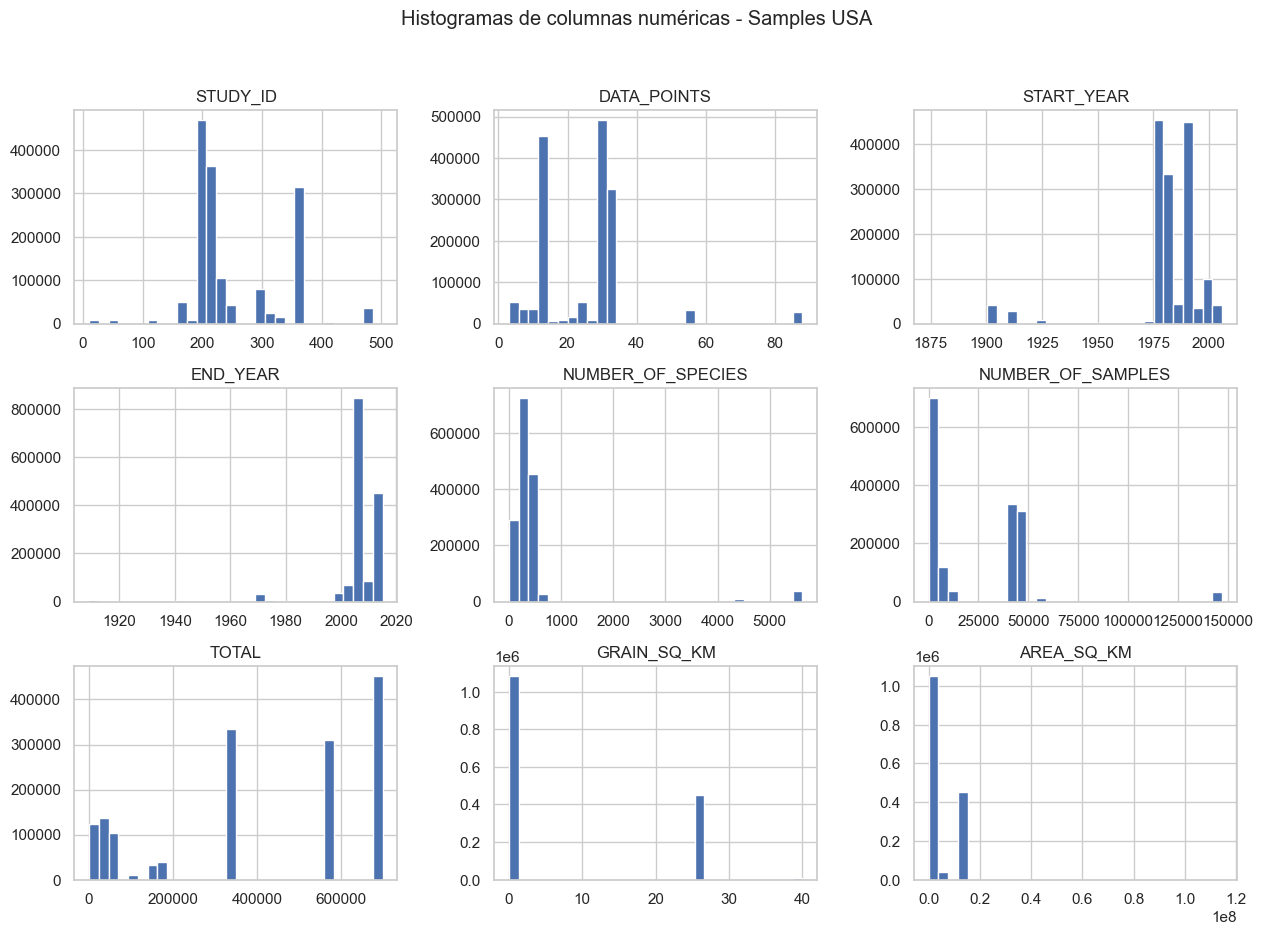

In [66]:
numeric_cols_studies = ['STUDY_ID', 'DATA_POINTS', 'START_YEAR', 'END_YEAR', 
                'NUMBER_OF_SPECIES', 'NUMBER_OF_SAMPLES', 'TOTAL', 
                'GRAIN_SQ_KM', 'AREA_SQ_KM'] # 'sum.allrawdata.BIOMASS'
studies_usa[numeric_cols_studies].hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogramas de columnas numéricas - Samples USA")
plt.show()

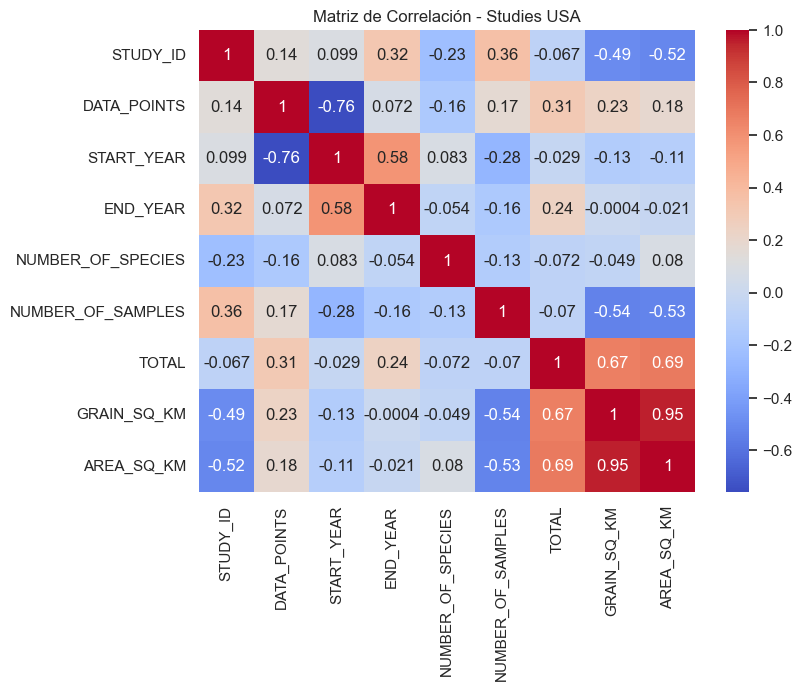

In [67]:
# Matriz de correlación para variables numéricas
corr_studies = studies_usa[numeric_cols_studies].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_studies, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación - Studies USA")
plt.show()

=== Resumen estadístico de variables numéricas ===
           STUDY_ID   DATA_POINTS    START_YEAR      END_YEAR  \
count  1.543705e+06  1.543705e+06  1.543705e+06  1.543705e+06   
mean   2.493043e+02  2.515905e+01  1.981931e+03  2.007135e+03   
std    7.622725e+01  1.357351e+01  1.874582e+01  1.055090e+01   
min    1.000000e+01  3.000000e+00  1.874000e+03  1.909000e+03   
25%    1.950000e+02  1.400000e+01  1.978000e+03  2.006000e+03   
50%    2.170000e+02  3.000000e+01  1.983000e+03  2.007000e+03   
75%    3.130000e+02  3.200000e+01  1.992000e+03  2.013000e+03   
max    5.020000e+02  8.800000e+01  2.006000e+03  2.015000e+03   

       NUMBER_OF_SPECIES  NUMBER_OF_SAMPLES         TOTAL   GRAIN_SQ_KM  \
count       1.543705e+06       1.543705e+06  1.543705e+06  1.543705e+06   
mean        4.439709e+02       2.330484e+04  4.102715e+05  7.658193e+00   
std         8.943055e+02       2.759221e+04  2.626410e+05  1.177903e+01   
min         3.000000e+00       1.000000e+00  6.000000e+01  0.00

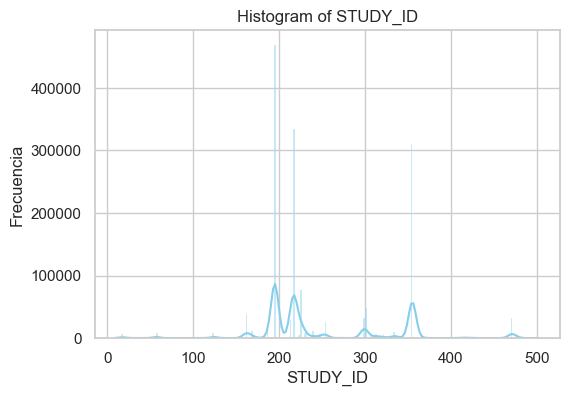

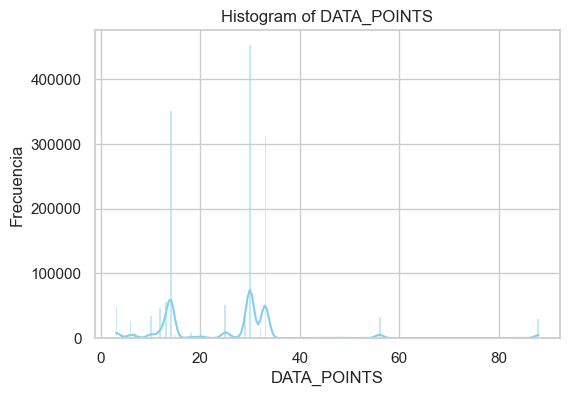

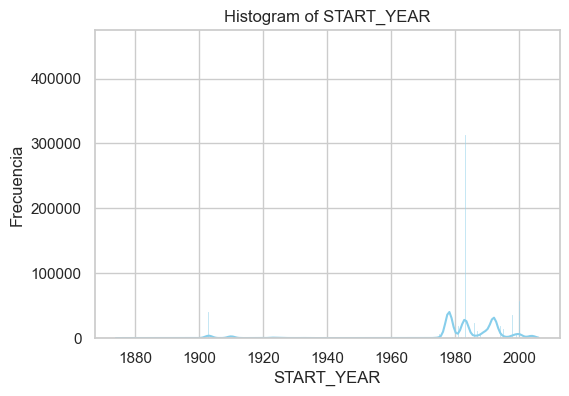

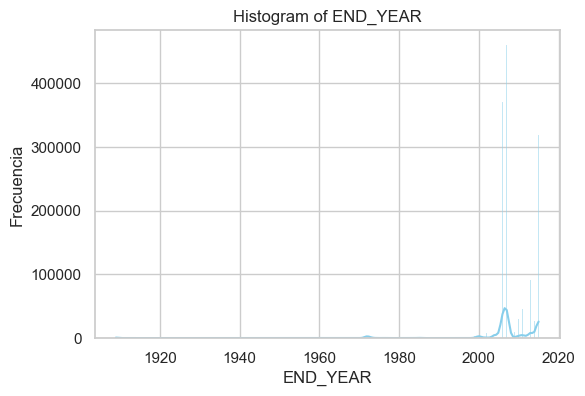

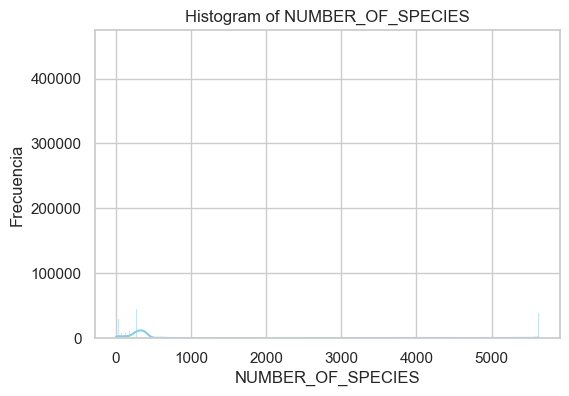

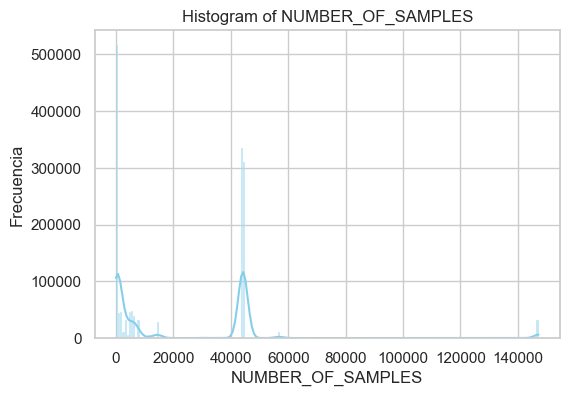

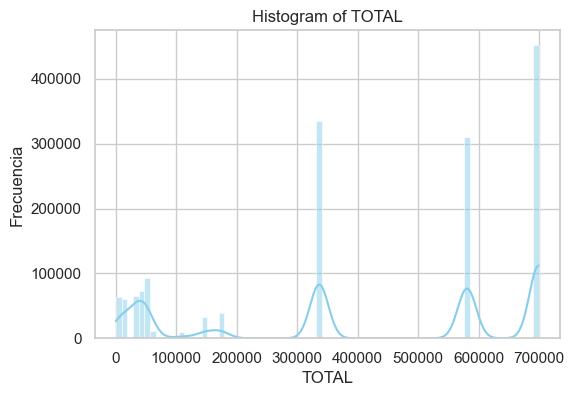

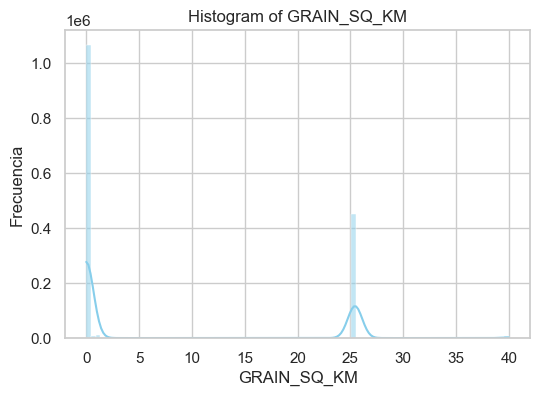

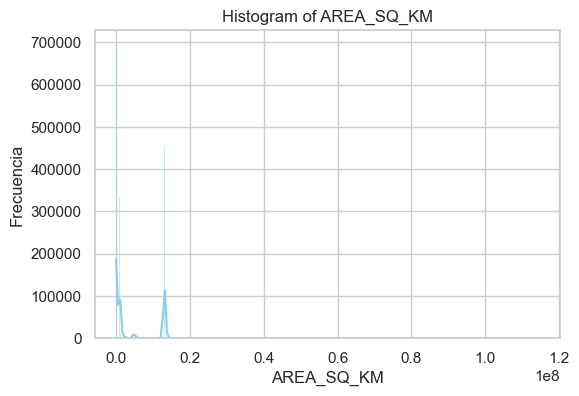

'\n# ==========================\n# 5. BOXPLOTS Y CONTEO DE OUTLIERS\n# ==========================\ndef count_outliers(series):\n    Q1 = series.quantile(0.25)\n    Q3 = series.quantile(0.75)\n    IQR = Q3 - Q1\n    lower_bound = Q1 - 1.5 * IQR\n    upper_bound = Q3 + 1.5 * IQR\n    return ((series < lower_bound) | (series > upper_bound)).sum()\n\nprint("\n=== Boxplots y conteo de outliers ===")\nfor col in numeric_cols:\n    plt.figure(figsize=(4, 6))\n    sns.boxplot(y=df[col], color=\'lightgreen\')\n    plt.title(f"Boxplot of {col}")\n    plt.ylabel(col)\n    plt.show()\n\n    outliers_count = count_outliers(df[col].dropna())\n    print(f"{col}: {outliers_count} outliers detectados.")\n\n# ==========================\n# 6. MAPA DE CALOR DE CORRELACIONES\n# ==========================\nprint("\n=== Mapa de calor de correlaciones ===")\ncorr_matrix = df[numeric_cols].corr()\nplt.figure(figsize=(8, 6))\nsns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)\nplt.title("Mat

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# ==========================
# 1. CARGA DE DATOS
# ==========================
# Supongamos que tu DataFrame se llama 'studies_usa'.
# Ajusta el nombre y la ruta de tu CSV/Excel si es necesario.
# studies_usa = pd.read_csv("ruta/del/archivo.csv")

df = studies_usa.copy()  # para no modificar el original

# ==========================
# 2. DEFINIR COLUMNAS
# ==========================
# Ajusta estas listas según tu dataset
numeric_cols = [
    'STUDY_ID', 'DATA_POINTS', 'START_YEAR', 'END_YEAR', 
    'NUMBER_OF_SPECIES', 'NUMBER_OF_SAMPLES', 'TOTAL',
    'GRAIN_SQ_KM', 'AREA_SQ_KM'
]

cat_cols = [
    # Ejemplos de columnas categóricas relevantes en la segunda tabla
    'CLIMATE', 'REALM', 'HABITAT', 'PROTECTED_AREA', 'GENERAL_TREAT',
    'TREATMENT'
    # Agrega aquí otras columnas categóricas si las tienes
]

# ==========================
# 3. RESUMEN ESTADÍSTICO
# ==========================
print("=== Resumen estadístico de variables numéricas ===")
print(df[numeric_cols].describe())

# ==========================
# 4. HISTOGRAMAS DE VARIABLES NUMÉRICAS
# ==========================
print("\n=== Histogramas de variables numéricas ===")
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col].dropna(), kde=True, color='skyblue')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()
'''
# ==========================
# 5. BOXPLOTS Y CONTEO DE OUTLIERS
# ==========================
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((series < lower_bound) | (series > upper_bound)).sum()

print("\n=== Boxplots y conteo de outliers ===")
for col in numeric_cols:
    plt.figure(figsize=(4, 6))
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.show()

    outliers_count = count_outliers(df[col].dropna())
    print(f"{col}: {outliers_count} outliers detectados.")

# ==========================
# 6. MAPA DE CALOR DE CORRELACIONES
# ==========================
print("\n=== Mapa de calor de correlaciones ===")
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de Correlación")
plt.show()

# ==========================
# 7. DISTRIBUCIÓN DE DATOS EN VARIABLES CATEGÓRICAS
# ==========================
print("\n=== Distribución de datos en variables categóricas ===")
for col in cat_cols:
    if col in df.columns:
        print(f"\n--- {col} ---")
        print(df[col].value_counts(dropna=False))
    else:
        print(f"\n--- {col} no existe en el DataFrame ---")

# ==========================
# 8. VALORES FALTANTES
# ==========================
print("\n=== Conteo de valores faltantes (NaN) por columna ===")
missing_counts = df.isnull().sum()
print(missing_counts)

# (Opcional) Proporción de valores faltantes:
print("\n=== Proporción de valores faltantes (NaN) por columna ===")
missing_ratio = df.isnull().mean()
print(missing_ratio)

# ==========================
# 9. CÁLCULO DEL VIF (Multicolinealidad)
# ==========================
print("\n=== Cálculo de VIF (Variance Inflation Factor) ===")
#  - Requiere un DataFrame solo con variables numéricas sin NaN
vif_data = df[numeric_cols].dropna().copy()

# Para evitar problemas con variables que son IDs o tienen poca varianza,
# podrías excluir 'STUDY_ID' si no es realmente una variable predictora.
# Ajusta según tu caso:
vars_for_vif = [col for col in numeric_cols if col != 'STUDY_ID']

X = vif_data[vars_for_vif]
# Añadir constante para el modelo
X_const = sm.add_constant(X)

vif_scores = []
for i, col in enumerate(X_const.columns):
    if col != 'const':  # no calculamos VIF de la constante
        vif_value = variance_inflation_factor(X_const.values, i)
        vif_scores.append((col, vif_value))

# Mostrar resultados
for col, vif in vif_scores:
    print(f"{col}: VIF = {vif:.2f}")

'''


=== Boxplots y conteo de outliers ===


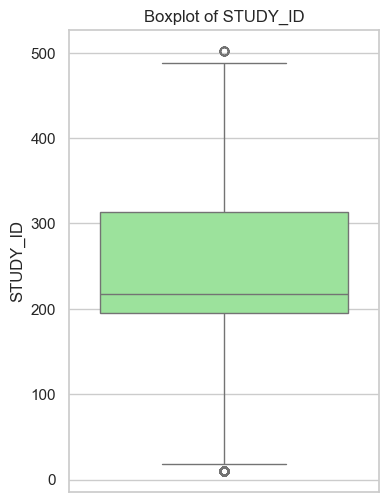

STUDY_ID: 1243 outliers detectados.


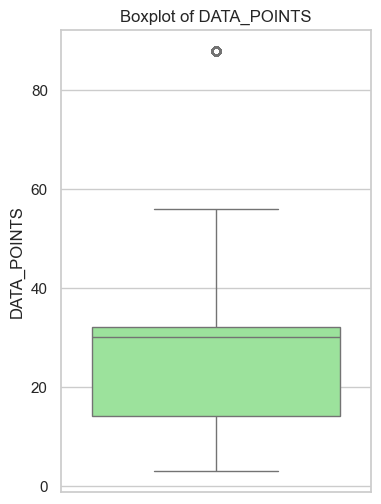

DATA_POINTS: 28901 outliers detectados.


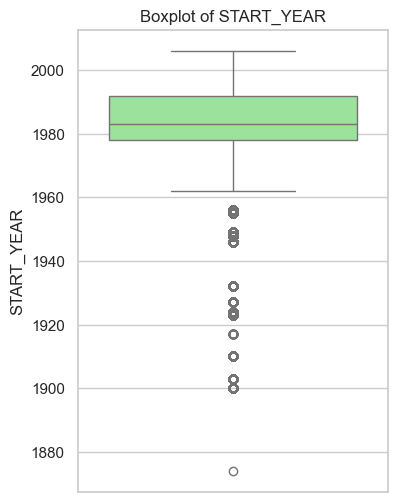

START_YEAR: 81674 outliers detectados.


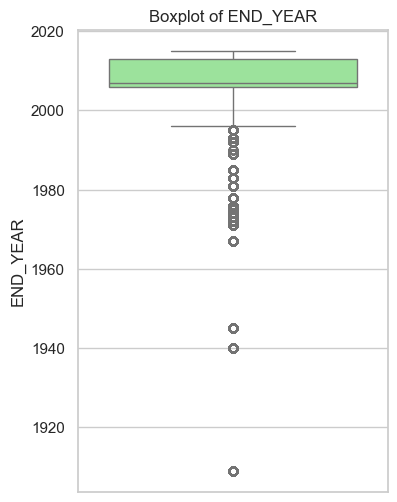

END_YEAR: 58558 outliers detectados.


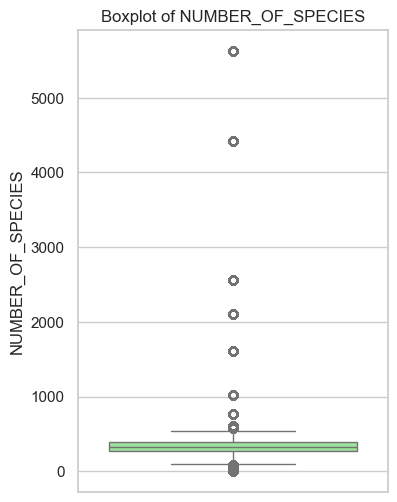

NUMBER_OF_SPECIES: 223318 outliers detectados.


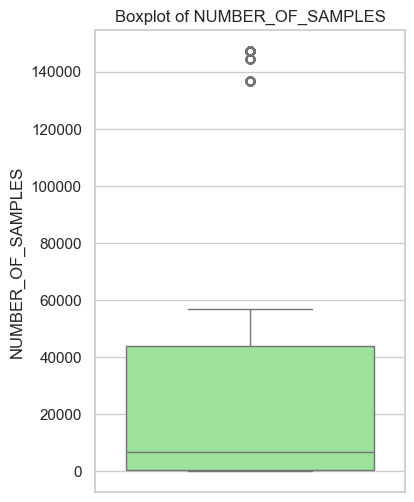

NUMBER_OF_SAMPLES: 32267 outliers detectados.


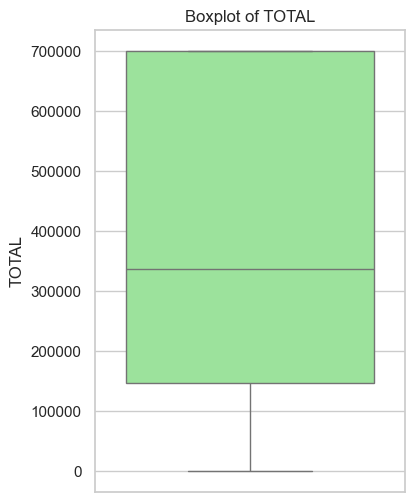

TOTAL: 0 outliers detectados.


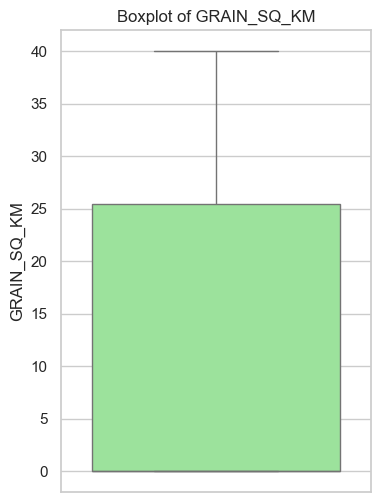

GRAIN_SQ_KM: 0 outliers detectados.


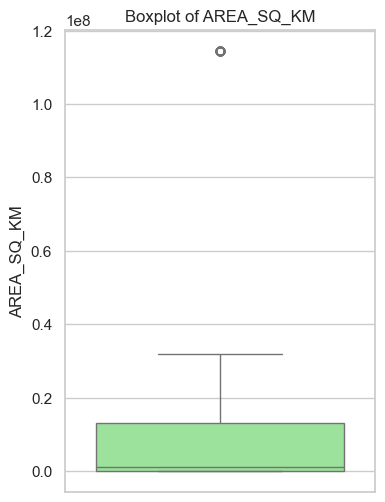

AREA_SQ_KM: 48 outliers detectados.


In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

numeric_cols = [
    'STUDY_ID', 'DATA_POINTS', 'START_YEAR', 'END_YEAR', 
    'NUMBER_OF_SPECIES', 'NUMBER_OF_SAMPLES', 'TOTAL',
    'GRAIN_SQ_KM', 'AREA_SQ_KM'
]

df = studies_usa.copy()
# ==========================
# 5. BOXPLOTS Y CONTEO DE OUTLIERS
# ==========================
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((series < lower_bound) | (series > upper_bound)).sum()

print("\n=== Boxplots y conteo de outliers ===")
for col in numeric_cols:
    plt.figure(figsize=(4, 6))
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.show()

    outliers_count = count_outliers(df[col].dropna())
    print(f"{col}: {outliers_count} outliers detectados.")

### Análisis samples usa

In [70]:
print("Dimensiones de samples:", samples_usa.shape)

Dimensiones de samples: (1543705, 10)


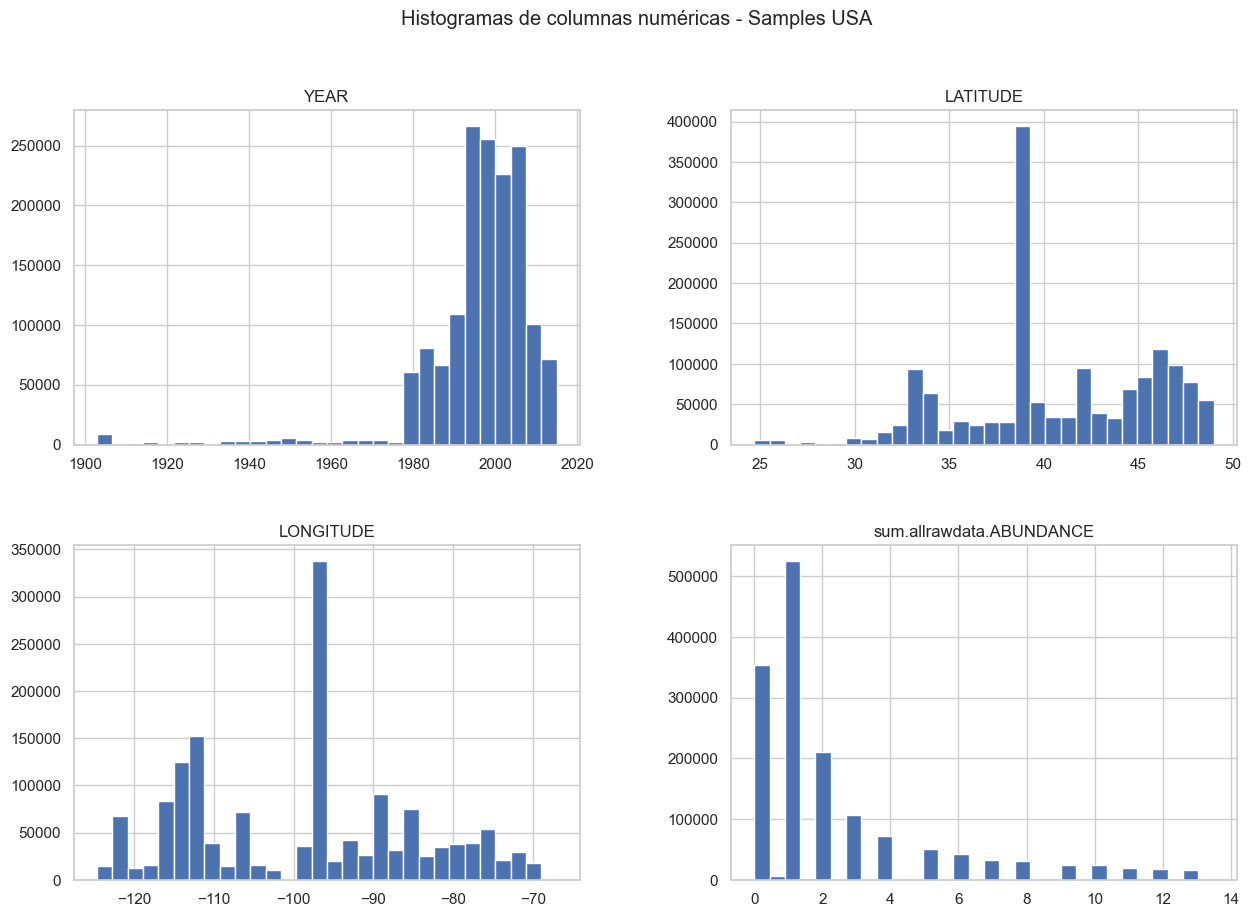

In [71]:
numeric_cols = ['YEAR', 'LATITUDE', 'LONGITUDE', 
                'sum.allrawdata.ABUNDANCE'] # 'sum.allrawdata.BIOMASS'
samples_usa[numeric_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogramas de columnas numéricas - Samples USA")
plt.show()

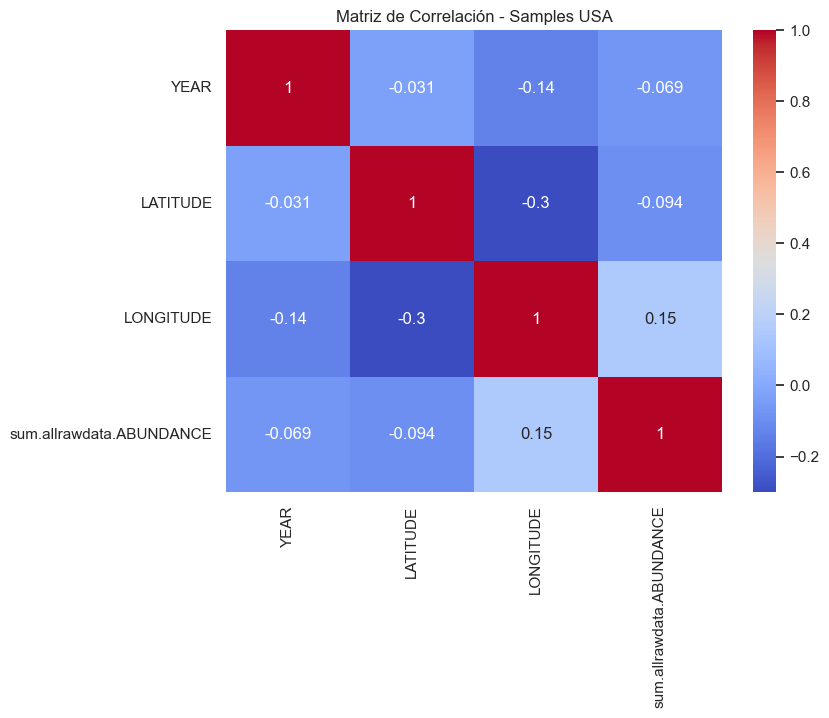

In [72]:
# Matriz de correlación para variables numéricas
corr = samples_usa[numeric_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación - Samples USA")
plt.show()

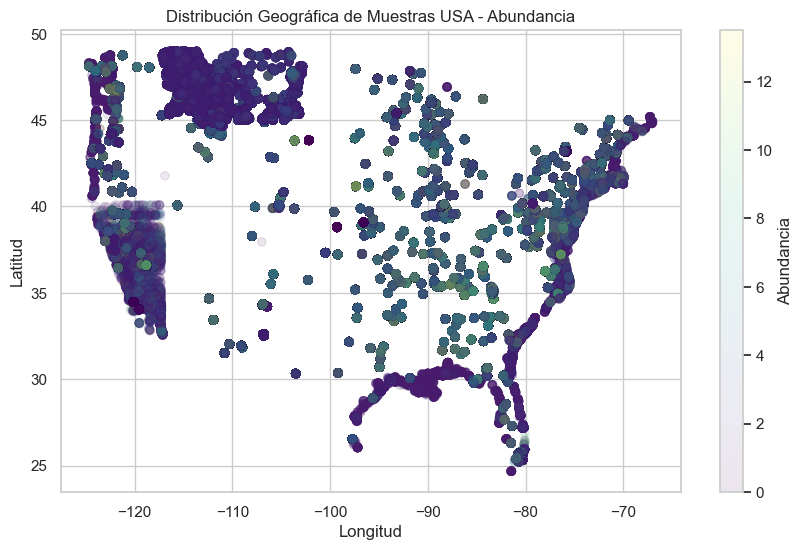

In [ ]:
# Análisis espacial: Distribución geográfica según Abundancia
plt.figure(figsize=(10, 6))
scatter = plt.scatter(samples_usa['LONGITUDE'], samples_usa['LATITUDE'], 
                      c=samples_usa['sum.allrawdata.ABUNDANCE'], cmap='viridis', alpha=0.1)
plt.colorbar(scatter, label='Abundancia')
plt.title("Distribución Geográfica de Muestras USA - Abundancia")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()